In [75]:
import vmlab
import igraph as ig
import pandas as pd
import matplotlib.pyplot as plt
from importlib import resources
import numpy as np
from scipy.sparse import csgraph


# Get variables for explaining fruit growth

To understand until which distance the fruits draw their carbon within the tree, some variables related to fruit growth are collected along the tree at several distances from the fruit. While connecting these variables to fruit masses, we hope to understand which of the distances have the most influence on the final fresh mass of the fruit.

### Data

One dmax value is chosen for the whole notebook ; it is the number of distances for which the functions are applied.

In [76]:
dmax = 10

Tree chosen to get the data for th ewhole notebook :

_Choose one tree and run the whole notebook at once_

In [77]:
# tree_name = 'E13'
# tree_name = 'E16'
tree_name = 'G3'

Sunlight fractions : computed from fisheye pictures of the GUs environments on the tree. The mean value on the fruting season is used here (to get only one value for each GU).

In [78]:
if tree_name == 'E13':
    sunlit_fractions_file_path = resources.path('vmlab.data.environment', 'fruting_season_sunlit_fractions_E13.csv')
elif tree_name == 'E16':
    sunlit_fractions_file_path = resources.path('vmlab.data.environment', 'fruting_season_sunlit_fractions_E16.csv')
elif tree_name == 'G3':
    sunlit_fractions_file_path = resources.path('vmlab.data.environment', 'fruting_season_sunlit_fractions_G3.csv')

sunlit_fraction_df = pd.read_csv(
            sunlit_fractions_file_path,
            sep='\\s+')
sunlit_fraction_df

,G3_02D,G3_02E,G3_02G,G3_03A,G3_03C,G3_03D,G3_03E,G3_03F,G3_04A,G3_04B,...,G3_32E,G3_32G,G3_34A,G3_34B,G3_34C,G3_34D,G3_34E,G3_35B,G3,mean
0,0.216323,0.085417,0.078437,0.214229,0.14825,0.325344,0.040604,0.120823,0.305896,0.184719,...,0.028802,0.044792,0.103135,0.092,0.109385,0.046542,0.180208,0.131604,0.084729,0.130779


Tree chosen for the whole notebook :

In [79]:
if tree_name == 'E13':
    tree_path = resources.path('vmlab.data.trees', 'tree_E13_leaf_completed.csv')
elif tree_name == 'E16':
    tree_path = resources.path('vmlab.data.trees', 'tree_E16_leaf_completed.csv')
elif tree_name == 'G3':
    tree_path = resources.path('vmlab.data.trees', 'tree_G3_leaf_completed.csv')

tree = pd.read_csv(tree_path)
graph = vmlab.to_graph(tree)

# for rows whose environment isn't specified : in exploration, multiplied by leaf number (=0 leaf anyways)
tree["environment_id"][pd.isna(tree["environment_id"])] = "mean"
tree

C:\Users\bolot\AppData\Local\Temp\ipykernel_6796\1376007719.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree["environment_id"][pd.isna(tree["environment_id"])] = "mean"


,id,type,parent_id,scaffold_id,topology__is_apical,arch_dev__pot_flowering_date,arch_dev__pot_nb_inflo,arch_dev__pot_nb_fruit,id_fruit,fruit_fresh_mass,fruit_dry_mass,growth__nb_leaf,growth__radius_gu,appearance__final_length_gu,environment_id,light_interception__sunlit_fraction_col
0,0,trunk,NaN,NaN,NaN,NAT,NaN,NaN,NaN,NaN,NaN,0.0,14.300000,68,mean,3
1,1,scaffold,0.0,1.0,0.0,NAT,NaN,NaN,NaN,NaN,NaN,0.0,6.210000,29,mean,3
2,2,scaffold,1.0,1.0,1.0,NAT,NaN,NaN,NaN,NaN,NaN,0.0,5.900000,66,mean,3
3,3,GU,2.0,1.0,0.0,NAT,NaN,NaN,NaN,NaN,NaN,0.0,2.108500,12,mean,3
4,4,multiple_GU,2.0,1.0,1.0,NaT,NaN,NaN,NaN,NaN,NaN,0.0,4.600000,61,mean,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,1135,GU,1133.0,558.0,0.0,NAT,NaN,NaN,NaN,NaN,NaN,8.0,0.220000,6,G3_34E,3
1136,1136,GU,1115.0,558.0,0.0,NAT,NaN,NaN,NaN,NaN,NaN,0.0,0.302974,8,mean,3
1137,1137,GU,1136.0,558.0,1.0,NAT,NaN,NaN,NaN,NaN,NaN,2.0,0.243556,13,G3_34D,3
1138,1138,GU,1137.0,558.0,1.0,NAT,NaN,NaN,NaN,NaN,NaN,6.0,0.170500,4,G3_34D,3


In [80]:
#tree['environment_id'][tree['environment_id']=='E16_14A']= 'mean'

Masses des fruits de l'arbre :

In [ ]:
with resources.path('vmlab.data.fruit_quality', 'fruits_masses.csv') as path:
    fruit_mass = pd.read_csv(path,
                             sep=",",
                             usecols=['id_UC', 'arbre', 'id_branche','id_fruit', 'MS_ini', 'MF_rec'],
                            )
fruit_mass.index=fruit_mass['id_UC']
fruit_mass.drop(columns = ['id_UC'], inplace=True)
fruit_mass = fruit_mass[fruit_mass['arbre']== tree_name ]
fruit_mass = fruit_mass[fruit_mass.index.notna()]

fruit_mass = fruit_mass.sort_index()

fruit_mass = fruit_mass.groupby(["id_UC"]).mean("MF_rec")
fruit_mass

,id_branche,MS_ini,MF_rec
id_UC,,,
6.0,3.0,NaN,464.00
58.0,2.0,7.500932,443.15
69.0,3.0,NaN,83.00
71.0,3.0,5.870691,370.00
165.0,1.0,5.607603,413.56
...,...,...,...
1072.0,35.0,NaN,359.00
1073.0,35.0,NaN,319.00
1079.0,35.0,5.790799,427.54


## Global exploration of the tree

In [82]:
print("Total leaves on the tree :", np.nansum(tree['growth__nb_leaf']))
print("Total fruits on the tree :", np.nansum(tree['arch_dev__pot_nb_fruit']))
print("Number of GUs on the tree: ", graph.ecount())

Total leaves on the tree : 8433.0
Total fruits on the tree : 95.0
Number of GUs on the tree:  1139


List of id of growth units bearing fruits on the studied tree :

In [83]:
fruity_GU = np.flatnonzero(tree['arch_dev__pot_nb_fruit'] > 0)
fruity_GU

array([  58,   69,   71,  165,  173,  205,  241,  246,  254,  261,  289,
        323,  330,  355,  358,  391,  400,  407,  409,  414,  415,  447,
        456,  460,  471,  476,  485,  488,  494,  501,  510,  525,  551,
        594,  622,  675,  679,  696,  709,  742,  743,  762,  769,  773,
        785,  814,  856,  891,  899,  912,  930,  971,  994,  995, 1007,
       1032, 1033, 1053, 1072, 1073, 1079, 1080, 1122], dtype=int64)

In [84]:
fruity_GU_types = tree.loc[np.flatnonzero(tree['arch_dev__pot_nb_fruit'] > 0), "type"]
fruity_GU_types

58          GU
69          GU
71          GU
165         GU
173     branch
         ...  
1072    branch
1073    branch
1079        GU
1080        GU
1122        GU
Name: type, Length: 63, dtype: object

In [85]:
tree.loc[fruity_GU, 'arch_dev__pot_nb_fruit']

58      2.0
69      2.0
71      1.0
165     1.0
173     4.0
       ... 
1072    1.0
1073    2.0
1079    1.0
1080    1.0
1122    1.0
Name: arch_dev__pot_nb_fruit, Length: 63, dtype: float64

### Undefined structures

Some structures on the tree are not as well described as regular growth units. They are labeled "branch", "branch_empty", "multiple_GU" or "undefined" (columns "type" in the dataframe). Theses undefined structures can lead to a bias in the variables picked up on the graph. They have to be detected to be then excluded from the dataset of variables explaining fruit growth.

In [86]:
def dist_to_undef (tree, dmax):
    graph = vmlab.to_graph(tree)
    adjacency = np.array(graph.get_adjacency())
    is_fruting = (tree['arch_dev__pot_nb_fruit'] > 0)

    distance_to_fruit = csgraph.shortest_path( 
                                adjacency,
                                indices=np.flatnonzero(is_fruting),
                                directed=False
                            ).astype(np.float32)
    distance_to_fruit[distance_to_fruit > dmax] = np.inf #collecting GU under a dmax distance only
    is_in_distance_to_fruit = np.isfinite(distance_to_fruit).astype(np.float32)
    dist_to_undef = np.copy(is_in_distance_to_fruit)
    dist_to_undef[dist_to_undef == 0] = np.nan
    dist_to_undef[dist_to_undef==1] = np.inf

    for i in range (len(np.flatnonzero(is_fruting))):
        for unit in tree.loc[is_in_distance_to_fruit[i]==1,'type'].index : 
            # if tree.loc[is_in_distance_to_fruit[i]==1,'type'][unit] == ("branch" or "branch_empty"or"scaffold_empty") : 
            if tree.loc[is_in_distance_to_fruit[i]==1,'type'][unit] !='GU' : 
                dist_to_undef[i,unit] = np.minimum(dist_to_undef[i,unit], distance_to_fruit[i,unit])

    return pd.DataFrame(np.nanmin(dist_to_undef, axis=1) , index = np.flatnonzero(is_fruting), columns = ["dist"])

In [87]:
table_dist_to_undef = dist_to_undef(tree,dmax)
table_dist_to_undef

,dist
58,10.0
69,inf
71,inf
165,inf
173,0.0
...,...
1072,0.0
1073,0.0
1079,8.0
1080,8.0


## Collecting variables to explain fruit growth

Fruit growth is supposed to be explained by the quantity of carbon available for each fruit. This one is here approximated with the leaf number, the fruit number and the light environment, which determines the sunlight fraction available for the leaves. The "get_var_fruit_growth" function collects these variables along the tree branches, in order to connect them with fruit masses measured on the field.

The variables are computed as followed :
- **reachable leaves** at a distance dmax : sum of all the leaves borne by the concerned GU, mutliplied by a "sharing coefficient" if the GUs send carbon components to several fruits ;
- **sharing coefficient** with a distance dmax :  number of fruits from which a GU is at a dmax distance (to wit the number of fruit to which a GU is sending carbon) ;
- **light fraction** at a distance dmax : mean of the light fraction of each concerned GU, multiplied by the number of leaves borne by the GU. The "sharing coefficient" is also applied to the leaf number.

### Functions

In [88]:
def get_var_fruit_growth_GU(tree, dmax, year_sunlit_fractions, with_successors=False) : 
    '''
    Returns the available carbon for each fruit computed in 3 different ways. This function only considers fruits borne by GU of type 'GU'.
    
    Parameters
    ----------
    tree : :class:`pandas.DataFrame` object
        Required format is identical with what is specified for the 'tree' input in the vmlab.create_setup function.

    dmax : integer

    year_sunlit_fractions : :class:`pandas.DataFrame` object
        Required format is identical with what is specified for the 'sunlit_fraction_df' input in the vmlab.processes.light_interception initialization.

    with_successors : boolean
        If True, the reachable distance includes all the successors of each GU within the distance (in this cas, aggregate is not taken into account). If False, it 
        does not include the GUs if they are further that dmax.

    Returns
    -------
    available_carbon_1, available_carbon_2, available_carbon_3 : :class:`numpay.array
    '''
    
    graph = vmlab.to_graph(tree)
    adjacency = np.array(graph.get_adjacency())
    GUs = tree.loc[tree.loc[:,'type'] == 'GU']

    # Initializaton (setting dtypes)
    distance_to_fruit = np.array([], dtype=np.float32)
    is_in_distance_to_fruit = np.array([], dtype=bool)
    is_fruting_and_GU_type = GUs['arch_dev__pot_nb_fruit'] > 0

    # Collecting GUs at the chosen distance dmax (with or without successors) from each fruit of the tree :
    if np.any(is_fruting_and_GU_type) : 
        distance_to_fruit = csgraph.shortest_path( 
                                    adjacency,
                                    indices=np.array(GUs[is_fruting_and_GU_type].index),
                                    directed=False
                                    ).astype(np.float32)

        # including successors :     
        if with_successors :
            distance_to_fruit[distance_to_fruit > dmax] = np.inf 
            is_in_distance_to_fruit = np.isfinite(distance_to_fruit).astype(np.float32)
            
            for fruit in is_in_distance_to_fruit :
                is_a_potential_mother = np.flatnonzero(fruit)
                distance_to_mother = csgraph.shortest_path( 
                                        adjacency,
                                        indices=is_a_potential_mother,
                                        directed=True
                                    ).astype(np.float32)    
                belongs_to_mother = np.isfinite(distance_to_mother).astype(np.float32)
                fruit += np.nansum(belongs_to_mother, axis=0)
                
            is_in_distance_to_fruit[is_in_distance_to_fruit!= 0] = 1

        # not including successors :
        else :
            distance_to_fruit[distance_to_fruit > dmax] = np.inf
            is_in_distance_to_fruit = np.isfinite(distance_to_fruit).astype(np.float32)

    # Collecting fruity and leafy GUs among the previously selected GUs :
    reachable_leaves = is_in_distance_to_fruit.copy()
    lit_frac = is_in_distance_to_fruit.copy()

    for i in range (len(np.flatnonzero(is_fruting_and_GU_type))):
        reachable_leaves [i,is_in_distance_to_fruit[i]==1] = tree.loc[is_in_distance_to_fruit[i]==1,'growth__nb_leaf']
        lit_frac [i,is_in_distance_to_fruit[i]==1] = year_sunlit_fractions.loc[:,tree.loc[is_in_distance_to_fruit[i]==1,'environment_id']] 

    # Taking into account the fact that some leaves share their carbon production between several fruits :
    leaf_fruit_sharing_number = np.nansum(np.transpose( 
            np.multiply(
                np.transpose(is_in_distance_to_fruit),                                                # GU bearing fruits to take into account
                np.array(GUs.loc[np.array(GUs[is_fruting_and_GU_type].index), 'arch_dev__pot_nb_fruit']) # number of fruits on these GUs                                                 
                )),
            axis=0)

    leaf_fruit_sharing_fraction = 1/ leaf_fruit_sharing_number 
    leaf_fruit_sharing_fraction[leaf_fruit_sharing_fraction==np.inf] = 0 

    # Computing variables of interest (np.nansum to avoid NA propagation) :
    sum_reachable_leaves = np.nansum(reachable_leaves, axis=1) 
    sum_reachable_leaves_shared = np.nansum(reachable_leaves*leaf_fruit_sharing_fraction, axis=1)
    available_carbon = np.nansum(lit_frac * reachable_leaves * leaf_fruit_sharing_fraction, axis=1)

    available_carbon_1 = sum_reachable_leaves 
    available_carbon_2 = sum_reachable_leaves_shared 
    available_carbon_3 = available_carbon
    
    return available_carbon_1, available_carbon_2, available_carbon_3

In [89]:
def get_var_fruit_growth(tree, dmax, year_sunlit_fractions, with_successors=False) : 
    '''
    Returns the available carbon for each fruit computed in 3 different ways. This function only considers fruits borne by GU of all types.
    
    Parameters
    ----------
    tree : :class:`pandas.DataFrame` object
        Required format is identical with what is specified for the 'tree' input in the vmlab.create_setup function.

    dmax : integer

    year_sunlit_fractions : :class:`pandas.DataFrame` object
        Required format is identical with what is specified for the 'sunlit_fraction_df' input in the vmlab.processes.light_interception initialization.

    with_successors : boolean
        If True, the reachable distance includes all the successors of each GU within the distance (in this cas, aggregate is not taken into account). If False, it 
        does not include the GUs if they are further that dmax.

    Returns
    -------
    available_carbon_1, available_carbon_2, available_carbon_3 : :class:`numpay.array
    '''
  
    graph = vmlab.to_graph(tree)
    adjacency = np.array(graph.get_adjacency())

    # Initializaton (setting dtypes)
    distance_to_fruit = np.array([], dtype=np.float32)
    is_in_distance_to_fruit = np.array([], dtype=bool)
    is_fruting = tree['arch_dev__pot_nb_fruit'] > 0

    # Collecting GUs at the chosen distance (with or without successors) from each fruit of the tree :
    if np.any(is_fruting) : 
        distance_to_fruit = csgraph.shortest_path( 
                                    adjacency,
                                    indices=np.flatnonzero(is_fruting),
                                    directed=False
                                    ).astype(np.float32)

        # including successors :     
        if with_successors :
            distance_to_fruit[distance_to_fruit > dmax] = np.inf 
            is_in_distance_to_fruit = np.isfinite(distance_to_fruit).astype(np.float32)
            
            for fruit in is_in_distance_to_fruit :
                is_a_potential_mother = np.flatnonzero(fruit)
                distance_to_mother = csgraph.shortest_path( 
                                        adjacency,
                                        indices=is_a_potential_mother,
                                        directed=True
                                    ).astype(np.float32)    
                belongs_to_mother = np.isfinite(distance_to_mother).astype(np.float32)
                fruit += np.nansum(belongs_to_mother, axis=0)
                
            is_in_distance_to_fruit[is_in_distance_to_fruit!= 0] = 1

        # not including successors :
        else :
            distance_to_fruit[distance_to_fruit > dmax] = np.inf 
            is_in_distance_to_fruit = np.isfinite(distance_to_fruit).astype(np.float32)

    # Collecting fruity and leafy GUs among the previously selected GUs :
    reachable_leaves = is_in_distance_to_fruit.copy()
    lit_frac = is_in_distance_to_fruit.copy()

    for i in range (len(np.flatnonzero(is_fruting))):
        reachable_leaves [i,is_in_distance_to_fruit[i]==1] = tree.loc[is_in_distance_to_fruit[i]==1,'growth__nb_leaf']
        lit_frac [i,is_in_distance_to_fruit[i]==1] = year_sunlit_fractions.loc[:,tree.loc[is_in_distance_to_fruit[i]==1,'environment_id']] 

    # Taking into account the fact that some leaves share their carbon production between several fruits :
    leaf_fruit_sharing_number = np.nansum(np.transpose( 
    np.multiply(
        np.transpose(is_in_distance_to_fruit),                                    # GU bearing fruits to take into account
        np.array(tree.loc[np.flatnonzero(is_fruting), 'arch_dev__pot_nb_fruit']) # number of fruits on these GUs                                                 
        )),
    axis=0)

    leaf_fruit_sharing_fraction = 1/ leaf_fruit_sharing_number 
    leaf_fruit_sharing_fraction[leaf_fruit_sharing_fraction==np.inf] = 0 

    assert leaf_fruit_sharing_fraction.all() <= 1
    assert leaf_fruit_sharing_fraction.all() >= 0

    # Computing variables of interest (np.nansum to avoid NA propagation) :
    sum_reachable_leaves = np.nansum(reachable_leaves, axis=1) 

    sum_reachable_leaves_shared = np.nansum(reachable_leaves*leaf_fruit_sharing_fraction, axis=1)
    available_carbon = np.nansum(lit_frac * reachable_leaves * leaf_fruit_sharing_fraction, axis=1)

    available_carbon_1 = sum_reachable_leaves 
    available_carbon_2 = sum_reachable_leaves_shared 
    available_carbon_3 = available_carbon 
    
    return available_carbon_1, available_carbon_2, available_carbon_3

In [90]:
# ## a backup of the previous version of the above function 'get_var_fruit_growth' computed on every fruity structures (not only GU types)

# def get_var_fruit_growth_backup(tree, dmax, year_sunlit_fractions, with_successors=False, aggregate=True) : 
#     '''
#     Returns the number of fruits and leaves reachable by each GU bearing a fruit in the input tree and its mean light environment index, at a maximum distance dmax.
    
#     Parameters
#     ----------
#     tree : :class:`pandas.DataFrame` object
#         Required format is identical with what is specified for the 'tree' input in the vmlab.create_setup function.

#     dmax : integer

#     year_sunlit_fractions : :class:`pandas.DataFrame` object
#         Required format is identical with what is specified for the 'sunlit_fraction_df' input in the vmlab.processes.light_interception initialization.

#     method : character
#         If "with successors", the reachable distance includes all the successors of each GU within the distance (in this cas, aggregate is not taken into account). If "without successors", it 
#         does not include the if they are further that dmax.

#     aggregate : boolean
#         If True, the function collects values from every GU within the dmax distance. If False, only from GU at dmax distance.
    
#     Returns
#     -------
#     reachable_leaf, reachable_fruit, lit_sunlit : :class:`numpay.array
#     '''
#     graph = vmlab.to_graph(tree)
#     adjacency = np.array(graph.get_adjacency())
        
#     # Initializaton
#     distance_to_fruit = np.array([], dtype=np.float32)
#     is_in_distance_to_fruit = np.array([], dtype=bool)
#     is_fruting = (tree['arch_dev__pot_nb_fruit'] > 0)

#     sum_reachable_leaves = np.zeros([], dtype=bool)
#     sum_reachable_fruits = np.zeros([], dtype=bool)
#     available_carbon = np.zeros([], dtype=bool)

#     # Collecting GUs at the chosen distance from each fruit of the tree
#     if with_successors :
#         if np.any(is_fruting) : 
#             distance_to_fruit = csgraph.shortest_path( 
#                                         adjacency,
#                                         indices=np.flatnonzero(is_fruting),
#                                         directed=False
#                                     ).astype(np.float32)
            
#             distance_to_fruit[distance_to_fruit > dmax] = np.inf 
#             is_in_distance_to_fruit = np.isfinite(distance_to_fruit).astype(np.float32)
            
#             for fruit in is_in_distance_to_fruit :
#                 is_a_potential_mother = np.flatnonzero(fruit)
#                 distance_to_mother = csgraph.shortest_path( 
#                                         adjacency,
#                                         indices=is_a_potential_mother,
#                                         directed=True
#                                     ).astype(np.float32)    
#                 belongs_to_mother = np.isfinite(distance_to_mother).astype(np.float32)
#                 fruit += np.nansum(belongs_to_mother, axis=0)
            
#             is_in_distance_to_fruit[is_in_distance_to_fruit !=0] = 1

#     else :
#         if np.any(is_fruting) : 
#             distance_to_fruit = csgraph.shortest_path( 
#                                         adjacency,
#                                         indices=np.flatnonzero(is_fruting),
#                                         directed=False
#                                     ).astype(np.float32)
#             if aggregate :
#                 distance_to_fruit[distance_to_fruit > dmax] = np.inf #collecting GU at exactly a dmax distance
#             else : 
#                 distance_to_fruit[distance_to_fruit != dmax] = np.inf #collecting GU under a dmax distance
#             is_in_distance_to_fruit = np.isfinite(distance_to_fruit).astype(np.float32)
    
#     # Collecting fruity and leafy GUs among the previously selected GUs :
#     reachable_leaves = np.copy(is_in_distance_to_fruit) # avoids changing the original array
#     reachable_fruits = np.copy(is_in_distance_to_fruit)
#     lit_frac = np.copy(is_in_distance_to_fruit)

#     # for i in range (len(np.flatnonzero(is_fruting))):
#     #         for unit in tree.loc[is_in_distance_to_fruit[i]==1,'type'].index : # according to the structure type
#     #             if tree.loc[is_in_distance_to_fruit[i]==1,'type'][unit] =='GU' : 
#     #                 #dist_to_undef[i,unit] = np.minimum(dist_to_undef[i,unit], distance_to_fruit[i,unit])
#     #                 reachable_leaves [i,unit] = tree.loc[unit,'growth__nb_leaf']
#     #                 reachable_fruits [i,unit] = tree.loc[unit,'arch_dev__pot_nb_fruit'] #the fruit itself is taken into account
#     #                 lit_frac [i,unit] = year_sunlit_fractions.loc[:,tree.loc[unit,'environment_id']] 

#     for i in range (len(np.flatnonzero(is_fruting))):
#         reachable_leaves [i,is_in_distance_to_fruit[i]==1] = tree.loc[is_in_distance_to_fruit[i]==1,'growth__nb_leaf']
#         reachable_fruits [i,is_in_distance_to_fruit[i]==1] = tree.loc[is_in_distance_to_fruit[i]==1,'arch_dev__pot_nb_fruit'] #the fruit itself is taken into account
#         lit_frac [i,is_in_distance_to_fruit[i]==1] = year_sunlit_fractions.loc[:,tree.loc[is_in_distance_to_fruit[i]==1,'environment_id']] 

#     # Taking into account the fact that some leaves share their carbon production between several fruits :
#     leaf_fruit_sharing_fraction = np.full(fill_value=np.nansum(np.multiply(np.array(tree.loc[np.flatnonzero(tree['arch_dev__pot_nb_fruit'] > 0), 'arch_dev__pot_nb_fruit']), np.transpose(is_in_distance_to_fruit)),axis=1), shape=(len(np.flatnonzero(is_fruting)),len(np.nansum(is_in_distance_to_fruit, axis=0))))
#     leaf_fruit_sharing_fraction = 1/ leaf_fruit_sharing_fraction
#     leaf_fruit_sharing_fraction[leaf_fruit_sharing_fraction==np.inf] = 0

#     assert leaf_fruit_sharing_fraction.all() <= 1
#     assert leaf_fruit_sharing_fraction.all() >= 0

#     # Computing variables of interest
#     available_carbon = np.nansum(lit_frac * reachable_leaves * leaf_fruit_sharing_fraction, axis=1)
#     sum_reachable_leaves = np.nansum(reachable_leaves * leaf_fruit_sharing_fraction, axis=1) #nansum to avoid NA propagation
#     sum_reachable_fruits = np.nansum(reachable_fruits, axis=1) #nansum to avoid NA propagation
#     LF = available_carbon / sum_reachable_fruits

#     return available_carbon, sum_reachable_leaves, sum_reachable_fruits, LF

### Error evaluation

Comparison between functions with or with fruits borne by segments of type different from 'GU'.

In [91]:
coef_with_branches = get_var_fruit_growth(tree, dmax, sunlit_fraction_df, with_successors=False)
coef_with_branches

C:\Users\bolot\AppData\Local\Temp\ipykernel_6796\1863864104.py:78: RuntimeWarning: divide by zero encountered in true_divide
  leaf_fruit_sharing_fraction = 1/ leaf_fruit_sharing_number


(array([558., 545., 545., 156., 568., 148., 154., 154., 154., 493.,  86.,
        611., 582., 295., 295., 284., 611., 591., 430., 591., 591., 622.,
        455., 411., 411., 411., 199., 368., 106.,  87.,  66., 236.,  76.,
        104., 901., 506., 506.,  82., 178., 639., 669.,  93.,  81.,  58.,
         48.,  96., 174.,  40., 375., 320., 390., 201., 244., 279., 244.,
        154., 154., 154., 860., 860., 860., 860.,  52.], dtype=float32),
 array([115.5       , 109.        , 109.        , 156.        ,
        116.29444444,  71.5       ,  35.99444444,  35.99444444,
         35.99444444,  97.84444444,  50.        ,  40.76879371,
         38.15340909, 147.5       , 147.5       , 284.        ,
         40.76879371,  38.67788462,  27.17788462,  38.67788462,
         38.67788462, 102.16587302,  52.29920635,  43.49920635,
         43.49920635,  43.49920635,  20.8047619 ,  54.91587302,
         13.7047619 ,  12.12142857,  35.        ,  76.08333333,
         66.33333333,  52.        , 473.5    

In [92]:
coef_without_branches = get_var_fruit_growth_GU(tree, dmax, sunlit_fraction_df, with_successors=False)
coef_without_branches

C:\Users\bolot\AppData\Local\Temp\ipykernel_6796\2469028730.py:79: RuntimeWarning: divide by zero encountered in true_divide
  leaf_fruit_sharing_fraction = 1/ leaf_fruit_sharing_number


(array([558., 545., 545., 156., 148., 154., 154., 154., 493.,  86., 295.,
        295., 284., 611., 591., 430., 591., 591., 455., 411., 411., 411.,
        199., 368., 106.,  87.,  66., 236.,  76., 104., 506., 506.,  82.,
        178.,  93.,  81.,  58.,  48.,  96., 174.,  40., 375., 320., 390.,
        201., 244., 279., 244., 154., 154., 154., 860., 860.,  52.],
       dtype=float32),
 array([115.5       , 109.        , 109.        , 156.        ,
         72.83333333,  36.35      ,  36.35      ,  36.35      ,
        453.93333333,  86.        , 147.5       , 147.5       ,
        284.        , 131.91666667, 111.91666667,  71.66666667,
        111.91666667, 111.91666667,  64.35800866,  55.55800866,
         55.55800866,  55.55800866,  27.9       , 112.22467532,
         14.63181818,  12.73181818,  35.        , 108.33333333,
         66.33333333,  52.        , 168.66666667, 168.66666667,
         33.33333333,  76.83333333,  47.43333333,  28.43333333,
         20.76666667,  42.1       , 

### Results

In [93]:
# result example fo the function above:
example1 = pd.DataFrame(np.transpose(get_var_fruit_growth_GU (tree, 10, sunlit_fraction_df, with_successors=False)), index=tree[(tree.loc[:,'type'] == 'GU') & (tree.loc[:,'arch_dev__pot_nb_fruit']>0) ].index, columns=["raw carbon", "shared carbon","shared light carbon"])
example1

C:\Users\bolot\AppData\Local\Temp\ipykernel_6796\2469028730.py:79: RuntimeWarning: divide by zero encountered in true_divide
  leaf_fruit_sharing_fraction = 1/ leaf_fruit_sharing_number


,raw carbon,shared carbon,shared light carbon
58,558.0,115.500000,18.197246
69,545.0,109.000000,17.926413
71,545.0,109.000000,17.926413
165,156.0,156.000000,13.208600
205,148.0,72.833333,5.362354
241,154.0,36.350000,7.143249
246,154.0,36.350000,7.143249
254,154.0,36.350000,7.143249
261,493.0,453.933333,57.701821
289,86.0,86.000000,9.339031


In [94]:
example2 = pd.DataFrame(np.transpose(get_var_fruit_growth(tree, 5, sunlit_fraction_df, with_successors=False)), index=np.flatnonzero(tree["arch_dev__pot_nb_fruit"]>0), columns=["raw carbon", "shared carbon","shared light carbon"])
example2

C:\Users\bolot\AppData\Local\Temp\ipykernel_6796\1863864104.py:78: RuntimeWarning: divide by zero encountered in true_divide
  leaf_fruit_sharing_fraction = 1/ leaf_fruit_sharing_number


,raw carbon,shared carbon,shared light carbon
58,137.0,68.500000,8.393896
69,134.0,44.666667,7.238875
71,134.0,44.666667,7.238875
165,21.0,21.000000,2.616766
173,415.0,103.750000,13.568314
...,...,...,...
1072,773.0,257.266667,33.645552
1073,773.0,257.266667,33.645552
1079,79.0,38.600000,5.617483
1080,79.0,38.600000,5.617483


<Axes: >

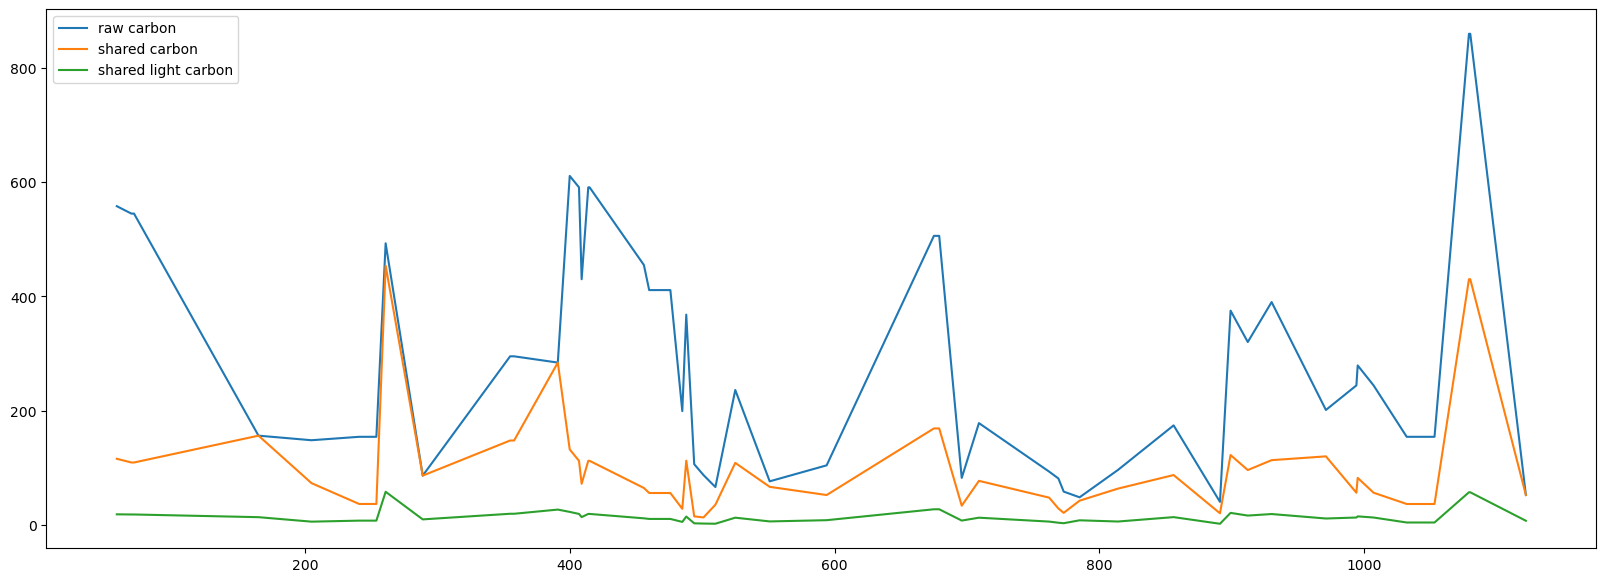

In [95]:
example1.plot(figsize=(20,7))

<Axes: >

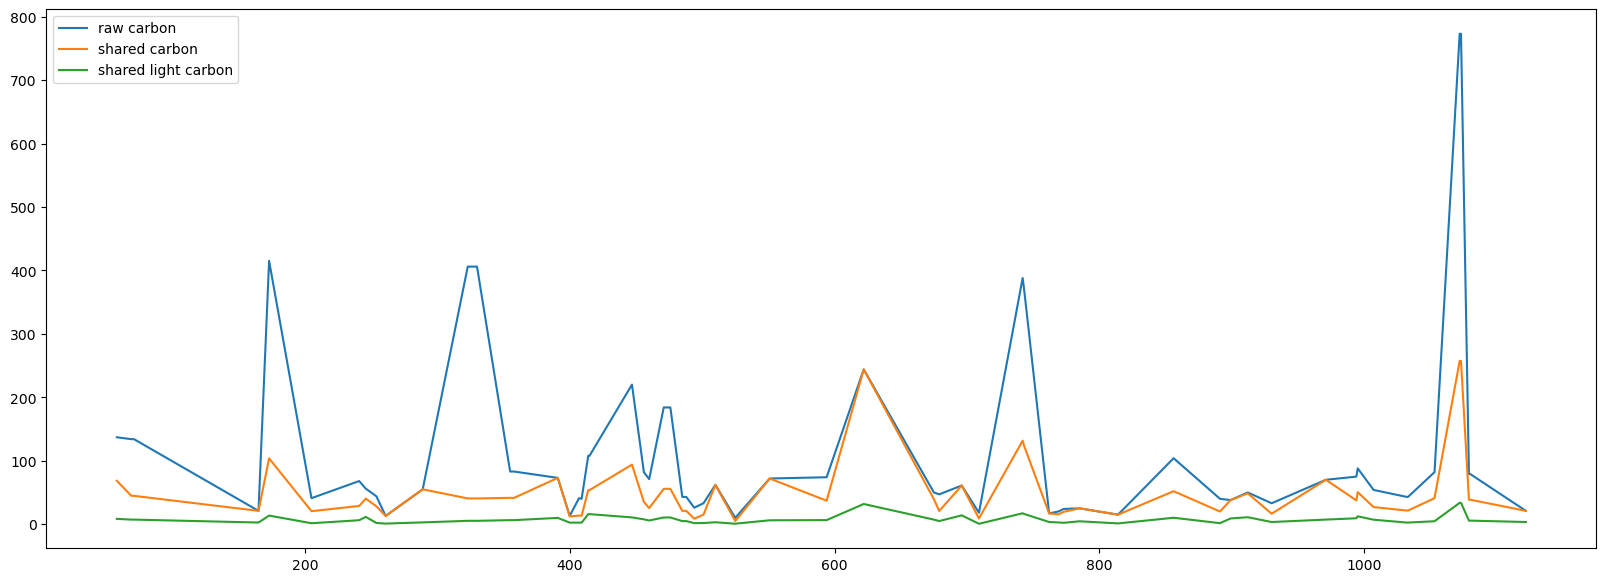

In [96]:
example2.plot(figsize=(20,7))

We can notice that for certain distances, the "with successors" method does not gather more reachable leaves because of the sharing coefficient.

To get the results of exploration, you need : 
- table_undef to be defined
- fruit_mass to be defined (and thus tree_name)

the function get_var_fruit_growth/GU

In [97]:
# collecting variables at the distance dmax :
results = [get_var_fruit_growth_GU(tree, i, sunlit_fraction_df, with_successors=False) for i in range (0, dmax+1)]

# results are fitted into a dataframe :
col_names = pd.MultiIndex.from_product(([i for i in range(0, dmax+1)],["raw carbon", "shared carbon","shared light carbon"]), names=["distance","variable"])
final_table = pd.DataFrame(np.transpose(np.vstack(results)), index=tree[(tree.loc[:,'type'] == 'GU') & (tree.loc[:,'arch_dev__pot_nb_fruit']>0) ].index, columns=col_names)
final_table = final_table.swaplevel("distance","variable",1).sort_index(axis=1,level="variable")

final_table["GU_type"] = tree.loc[tree['arch_dev__pot_nb_fruit'] >0]['type']
final_table["dist_to_undef"] = table_dist_to_undef

final_table['tree'] = np.full(fill_value = tree_name, shape = len(final_table.index))

final_table = np.transpose(final_table)
final_table

C:\Users\bolot\AppData\Local\Temp\ipykernel_6796\2469028730.py:79: RuntimeWarning: divide by zero encountered in true_divide
  leaf_fruit_sharing_fraction = 1/ leaf_fruit_sharing_number
C:\Users\bolot\AppData\Local\Temp\ipykernel_6796\2469028730.py:79: RuntimeWarning: divide by zero encountered in true_divide
  leaf_fruit_sharing_fraction = 1/ leaf_fruit_sharing_number
C:\Users\bolot\AppData\Local\Temp\ipykernel_6796\2469028730.py:79: RuntimeWarning: divide by zero encountered in true_divide
  leaf_fruit_sharing_fraction = 1/ leaf_fruit_sharing_number
C:\Users\bolot\AppData\Local\Temp\ipykernel_6796\2469028730.py:79: RuntimeWarning: divide by zero encountered in true_divide
  leaf_fruit_sharing_fraction = 1/ leaf_fruit_sharing_number
C:\Users\bolot\AppData\Local\Temp\ipykernel_6796\2469028730.py:79: RuntimeWarning: divide by zero encountered in true_divide
  leaf_fruit_sharing_fraction = 1/ leaf_fruit_sharing_number
C:\Users\bolot\AppData\Local\Temp\ipykernel_6796\2469028730.py:79: Run

58         69         71         165   \
variable            distance                                               
raw carbon          0              18.0        7.0       10.0        7.0   
                    1              18.0       16.0       19.0        8.0   
                    2              18.0       76.0       76.0       18.0   
                    3              32.0       83.0       83.0       18.0   
                    4             100.0      132.0      132.0       19.0   
                    5             137.0      134.0      134.0       21.0   
                    6             196.0      149.0      149.0       25.0   
                    7             231.0      281.0      281.0       38.0   
                    8             357.0      388.0      388.0       75.0   
                    9             545.0      509.0      509.0      117.0   
                    10            558.0      545.0      545.0      156.0   
shared carbon       0               9.0        3.5       10.0        7.0   
                    1               9.0        6.5       13.0        8.0   
                    2               9.0  25.333333  25.333333       18.0   
                    3              16.0  27.666667  27.666667       18.0   
                    4              50.0       44.0       44.0       19.0   
                    5              68.5  44.666667  44.666667       21.0   
                    6              96.5       49.0       49.0       25.0   
                    7              96.3  85.133333  85.133333       38.0   
                    8             112.5      100.0      100.0       75.0   
                    9             119.8      101.8      101.8      117.0   
                    10            115.5      109.0      109.0      156.0   
shared light carbon 0          0.440719   0.749802   2.142292   0.867708   
                    1          0.440719   0.950802   2.343292   0.991667   
                    2          0.440719   4.985451   4.985451    2.23125   
                    3          1.004792   5.169556   5.169556    2.23125   
                    4          5.766438   7.211806   7.211806   2.355208   
                    5          8.393896   7.238875   7.238875   2.616766   
                    6          9.908719   7.708962   7.708962   2.841725   
                    7         10.443387  15.749016  15.749016   3.658266   
                    8         15.007513  19.410714  19.410714   6.868506   
                    9         19.380231    16.9572    16.9572  10.185433   
                    10        18.197246  17.926413  17.926413    13.2086   
GU_type                              GU         GU         GU         GU   
dist_to_undef                      10.0        inf        inf        inf   
tree                                 G3         G3         G3         G3   

                                   205       241        246       254   \
variable            distance                                             
raw carbon          0              14.0      18.0       18.0       6.0   
                    1              26.0      35.0       33.0      20.0   
                    2              26.0      47.0       35.0      23.0   
                    3              28.0      51.0       38.0      28.0   
                    4              29.0      55.0       42.0      32.0   
                    5              41.0      68.0       56.0      44.0   
                    6              54.0      75.0       65.0      52.0   
                    7              59.0     118.0      110.0      98.0   
                    8              81.0     143.0      143.0     143.0   
                    9             125.0     154.0      154.0     154.0   
                    10            148.0     154.0      154.0     154.0   
shared carbon       0               7.0       9.0       18.0       6.0   
                    1              13.0      17.5       33.0      20.0   
                    2              1

In [98]:
# filtering the lines biased by the undefined structures mentionned above :
final_table.drop(labels = [i for i in final_table.columns if np.any(final_table.loc["GU_type", i]!="GU")], axis=1, inplace=True)
final_table.drop(labels = [i for i in final_table.columns if np.any(final_table.loc["dist_to_undef", i] != np.Inf)], axis=1,inplace=True) # /!\ if dmax np.max(table_dist_to_undef), no line left

# table ready to be exported as a csv file
final_table

69         71         165        205   \
variable            distance                                               
raw carbon          0               7.0       10.0        7.0       14.0   
                    1              16.0       19.0        8.0       26.0   
                    2              76.0       76.0       18.0       26.0   
                    3              83.0       83.0       18.0       28.0   
                    4             132.0      132.0       19.0       29.0   
                    5             134.0      134.0       21.0       41.0   
                    6             149.0      149.0       25.0       54.0   
                    7             281.0      281.0       38.0       59.0   
                    8             388.0      388.0       75.0       81.0   
                    9             509.0      509.0      117.0      125.0   
                    10            545.0      545.0      156.0      148.0   
shared carbon       0               3.5       10.0        7.0        7.0   
                    1               6.5       13.0        8.0       13.0   
                    2         25.333333  25.333333       18.0       13.0   
                    3         27.666667  27.666667       18.0       14.0   
                    4              44.0       44.0       19.0       14.5   
                    5         44.666667  44.666667       21.0       20.5   
                    6              49.0       49.0       25.0       27.0   
                    7         85.133333  85.133333       38.0       29.5   
                    8             100.0      100.0       75.0       40.5   
                    9             101.8      101.8      117.0       62.5   
                    10            109.0      109.0      156.0  72.833333   
shared light carbon 0          0.749802   2.142292   0.867708   0.515375   
                    1          0.950802   2.343292   0.991667   0.957125   
                    2          4.985451   4.985451    2.23125   0.957125   
                    3          5.169556   5.169556    2.23125    1.03075   
                    4          7.211806   7.211806   2.355208   1.067563   
                    5          7.238875   7.238875   2.616766   1.509312   
                    6          7.708962   7.708962   2.841725   1.987875   
                    7         15.749016  15.749016   3.658266   2.171937   
                    8         19.410714  19.410714   6.868506   2.981812   
                    9           16.9572    16.9572  10.185433   4.601562   
                    10        17.926413  17.926413    13.2086   5.362354   
GU_type                              GU         GU         GU         GU   
dist_to_undef                       inf        inf        inf        inf   
tree                                 G3         G3         G3         G3   

                                  241        246       254       289   \
variable            distance                                            
raw carbon          0             18.0       18.0       6.0      15.0   
                    1             35.0       33.0      20.0      31.0   
                    2             47.0       35.0      23.0      41.0   
                    3             51.0       38.0      28.0      51.0   
                    4             55.0       42.0      32.0      53.0   
                    5             68.0       56.0      44.0      55.0   
                    6             75.0       65.0      52.0      55.0   
                    7            118.0      110.0      98.0      55.0   
                    8            143.0      143.0     143.0      55.0   
                    9            154.0      154.0     154.0      55.0   
                    10           154.0      154.0     154.0      86.0   
shared carbon       0              9.0       18.0       6.0      15.0   
                    1             17.5       33.0      20.0      31.0   
                    2             23.5       35.0  

In [99]:
if tree_name == 'E13' :
    path = resources.path('vmlab.data.results', 'exploration_E13_fruting_season_topo.csv') 
if tree_name == 'E16' :
    path = resources.path('vmlab.data.results', 'exploration_E16_fruting_season_topo.csv') 
if tree_name == 'G3' :
    path = resources.path('vmlab.data.results', 'exploration_G3_fruting_season_topo.csv') 

np.transpose(final_table.swaplevel("variable","distance",0) .sort_index(axis=0,level="distance")).to_csv(path_or_buf= path)

## Further researches on the tree

Since results were not very clear after plotting the variables on R, further researches are led.

In [100]:
from math import ceil

### Fruit mass

In [101]:
fruit_mass.sort_values("MF_rec")

,id_branche,MS_ini,MF_rec
id_UC,,,
400.0,14.0,NaN,70.000
69.0,3.0,NaN,83.000
622.0,20.0,NaN,231.000
476.0,9.0,NaN,247.000
891.0,26.0,5.167755,260.910
...,...,...,...
289.0,7.0,7.564448,525.070
994.0,31.0,6.283677,529.590
995.0,31.0,NaN,550.000


In [102]:
fruit_mass.describe()

,id_branche,MS_ini,MF_rec
count,64.000000,34.000000,64.000000
mean,18.109375,6.504922,392.759557
std,10.554646,1.356807,94.018094
min,1.000000,4.695123,70.000000
25%,9.000000,5.589909,353.898750
50%,16.000000,6.190099,404.775000
75%,27.000000,7.166214,443.402500
max,37.000000,11.380306,566.365000


<Axes: xlabel='Masse du fruit (g)', ylabel='nombre de fruits'>

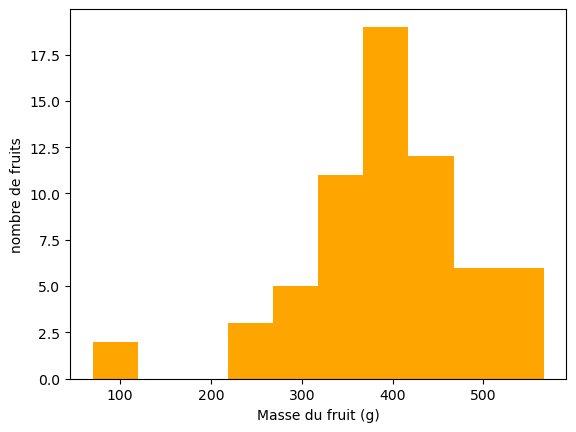

In [103]:
fruit_mass['MF_rec'].plot(kind="hist", ylabel = "nombre de fruits", xlabel="Masse du fruit (g)", color="orange")

Branches are created from each fruit, and are defined as the group of GU at the d distance of this fruit. Dupplicates are droped, and non proper grotwh units (branch, branch empty...) are removed as well.

In [104]:
def collect_branches (tree, dmax, drop_dupplicate = False):
    graph = vmlab.to_graph(tree)
    adjacency = np.array(graph.get_adjacency())
    is_fruting = (tree['arch_dev__pot_nb_fruit'] > 0)

    # Initializaton
    distance_to_fruit = np.array([], dtype=np.float32)
    is_in_distance_to_fruit = np.array([], dtype=bool)

    # Collecting GUs (fruit GU included)
    if np.any(is_fruting) : 
        distance_to_fruit = csgraph.shortest_path( 
                                    adjacency,
                                    indices=np.flatnonzero(is_fruting),
                                    directed=False
                                ).astype(np.float32)

        distance_to_fruit[distance_to_fruit > dmax] = np.inf #collecting GU under a dmax distance
        is_in_distance_to_fruit = np.isfinite(distance_to_fruit).astype(np.float32) 
        is_in_distance_to_fruit[is_in_distance_to_fruit==0] = np.nan

        fruit_mass_of_reachable_GU = pd.DataFrame(np.copy(is_in_distance_to_fruit).astype(float), index=np.flatnonzero(is_fruting))
        
    for i in range (0, graph.ecount()):
        if i in fruit_mass.index:
            fruit_mass_of_reachable_GU.loc[fruit_mass_of_reachable_GU[i]==1,i] = fruit_mass.loc[i,"MF_rec"]
    fruit_mass_of_reachable_GU[fruit_mass_of_reachable_GU==1] = np.nan
    fruit_mass_of_reachable_GU["type"] = tree.loc[tree['arch_dev__pot_nb_fruit'] >0]['type']
    if drop_dupplicate == True :
        fruit_mass_of_reachable_GU.drop_duplicates(inplace=True, keep="first")
    fruit_mass_of_reachable_GU.drop(labels = [i for i in fruit_mass_of_reachable_GU.index if i not in fruit_mass.index], inplace=True)
    #fruit_mass_of_reachable_GU.drop(labels = [i for i in fruit_mass_of_reachable_GU.index if fruit_mass_of_reachable_GU.loc[i, "type"]!="GU"], inplace=True)
    fruit_mass_of_reachable_GU.drop(columns="type", inplace=True)

    return np.transpose(fruit_mass_of_reachable_GU)

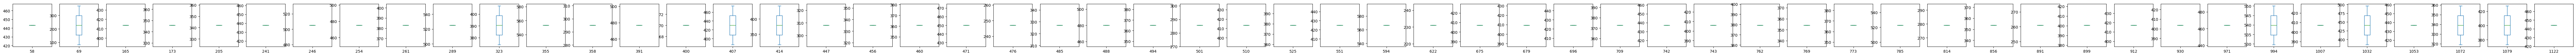

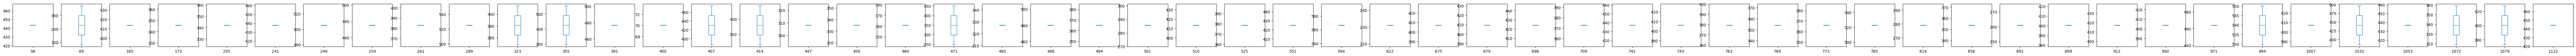

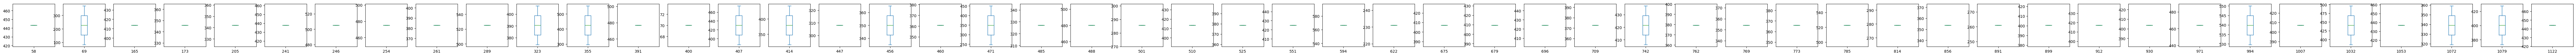

In [105]:
for branch_size in range (3,6):
    test = collect_branches(tree, branch_size, drop_dupplicate= True)
    test.plot(kind="box", subplots=True, figsize=(120,2))

/!\ On ne peut accéder à une branche que par le plus petit fruit contenu dans cette branche si on supprime les doublons

In [106]:
graph.ecount()

1139

In [107]:
from_tree = pd.DataFrame([collect_branches(tree, i, drop_dupplicate=True).std() for i in range (35,0,-1)], index = [i for i in range (35,0,-1)] ) 
from_tree["mean deviation"] = np.mean(from_tree, axis=1)

<Axes: title={'center': 'Moyenne des écarts types des masses de fruits des branches formées par chaque distance d'}, xlabel="longueur de la branche (en nombre d'UC)", ylabel='Moyenne des écarts types'>

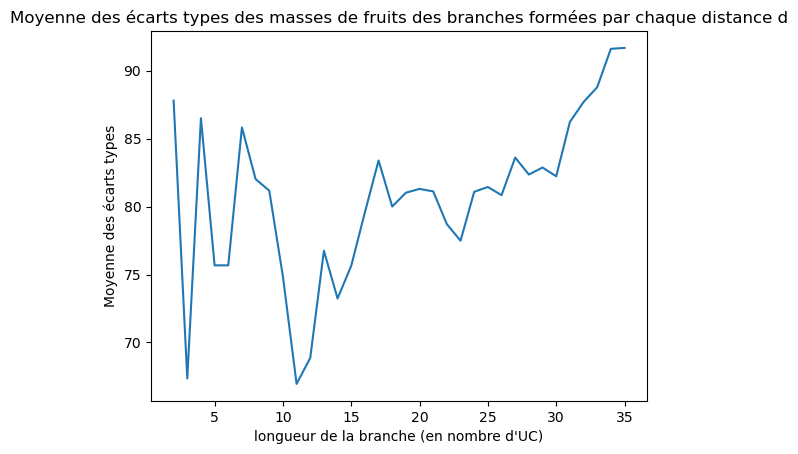

In [108]:
from_tree["mean deviation"].plot(title = "Moyenne des écarts types des masses de fruits des branches formées par chaque distance d", xlabel="longueur de la branche (en nombre d'UC)", ylabel="Moyenne des écarts types")

L'écart type moyen entre les masses des fruits est minimal pour d = 3 la longueur de la branche. Quand les branches se supperposent potentiellement, et ne tiennent pas compte du "type".

L'écart type moyen entre les masses des fruits est minimal pour d = 5 quand on supprime les doublons.

In [109]:
from_tree[from_tree["mean deviation"] == np.min(from_tree["mean deviation"])].index

Index([11], dtype='int64')

array([<Axes: title={'center': '58'}>, <Axes: title={'center': '69'}>,
       <Axes: title={'center': '165'}>, <Axes: title={'center': '173'}>,
       <Axes: title={'center': '205'}>, <Axes: title={'center': '241'}>,
       <Axes: title={'center': '261'}>, <Axes: title={'center': '323'}>,
       <Axes: title={'center': '330'}>, <Axes: title={'center': '355'}>,
       <Axes: title={'center': '400'}>, <Axes: title={'center': '407'}>,
       <Axes: title={'center': '447'}>, <Axes: title={'center': '456'}>,
       <Axes: title={'center': '488'}>, <Axes: title={'center': '494'}>,
       <Axes: title={'center': '594'}>, <Axes: title={'center': '622'}>,
       <Axes: title={'center': '675'}>, <Axes: title={'center': '709'}>,
       <Axes: title={'center': '742'}>, <Axes: title={'center': '762'}>,
       <Axes: title={'center': '769'}>, <Axes: title={'center': '773'}>,
       <Axes: title={'center': '785'}>, <Axes: title={'center': '856'}>,
       <Axes: title={'center': '912'}>, <Axes: title=

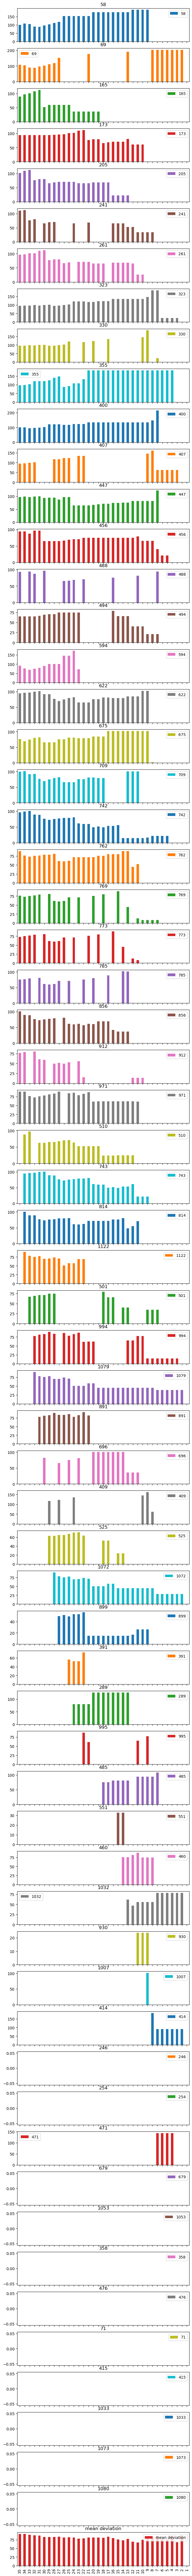

In [110]:
from_tree.plot(subplots=True, kind="bar", figsize=(8,120))

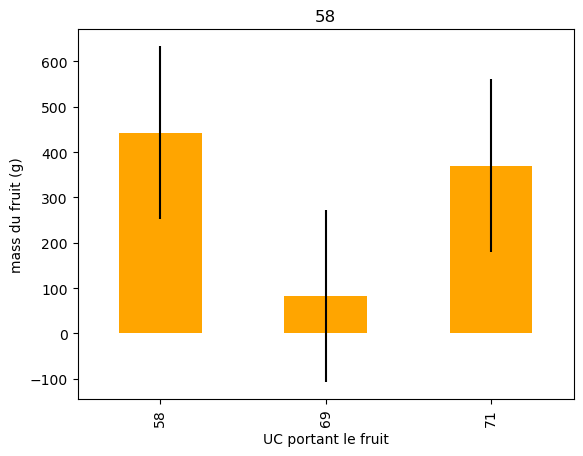

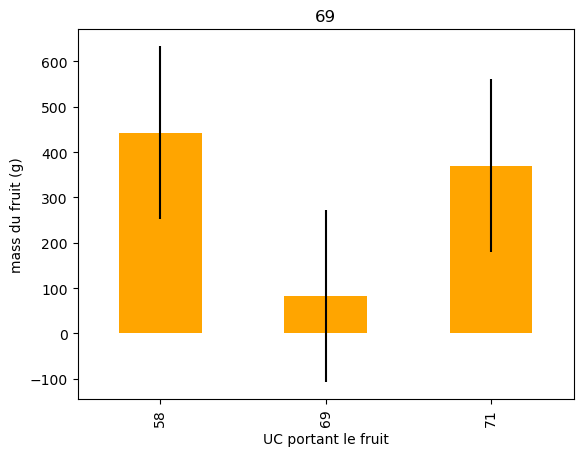

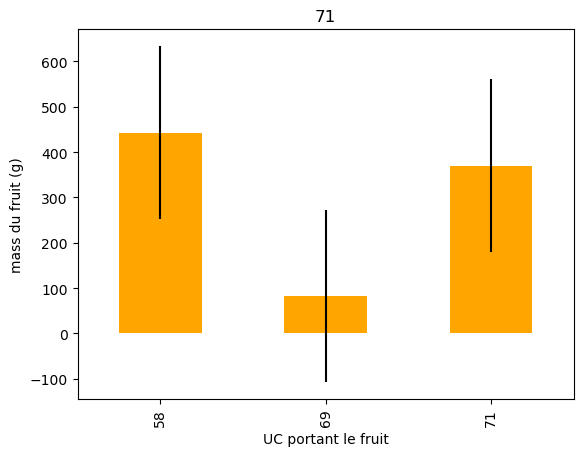

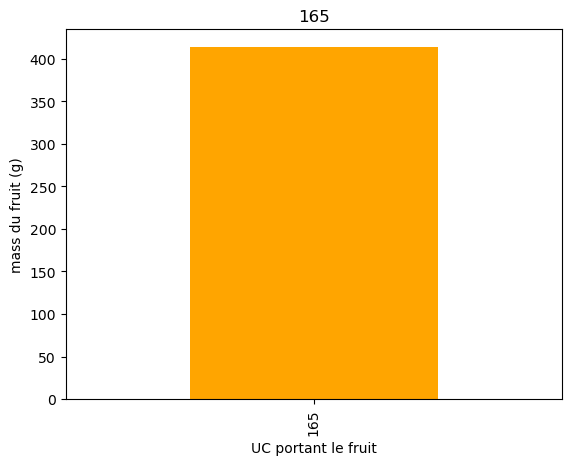

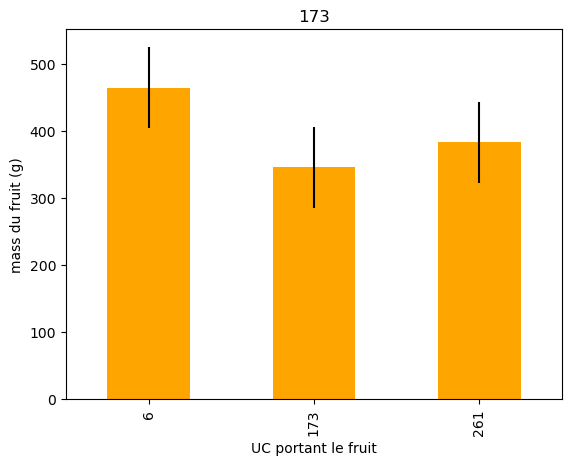

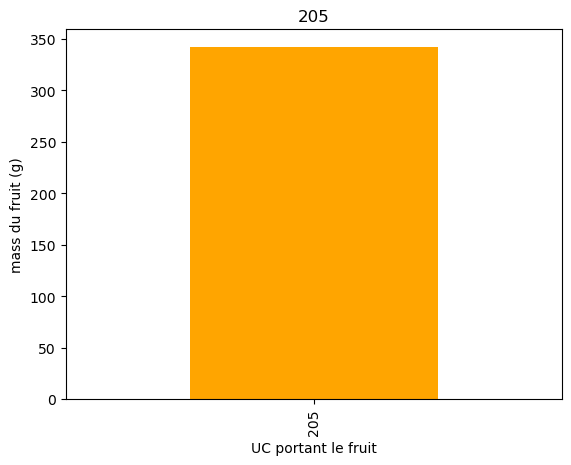

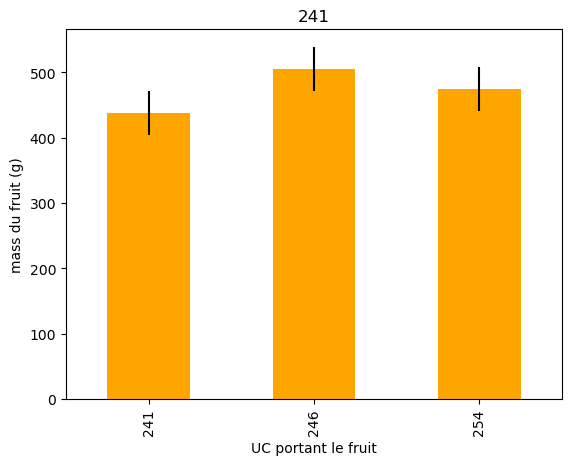

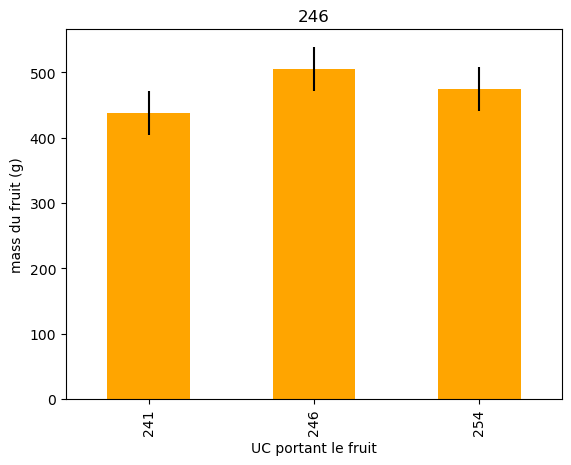

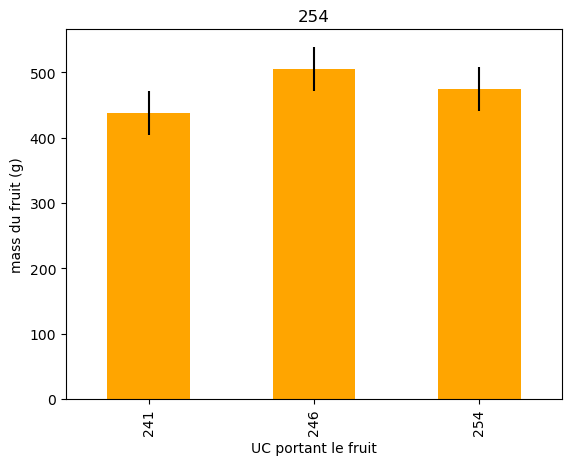

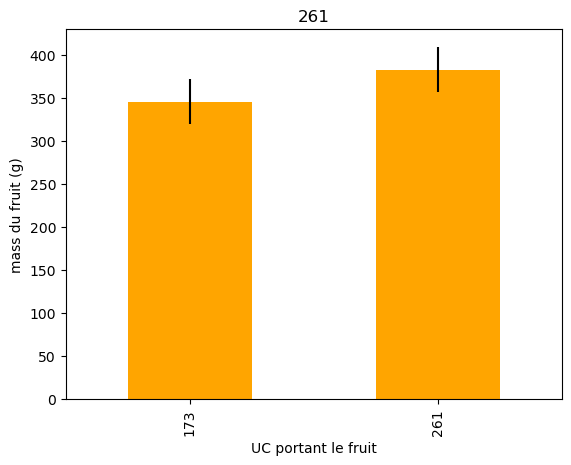

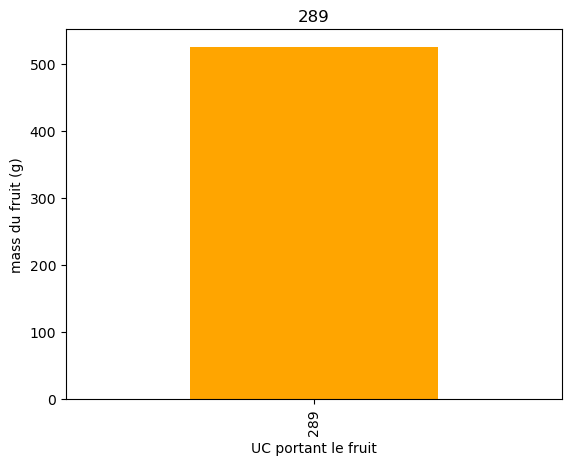

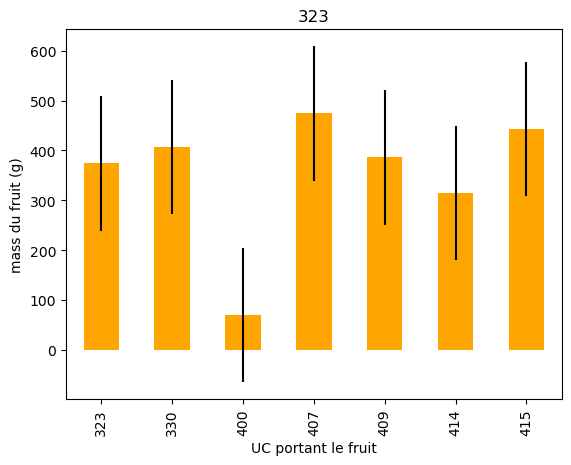

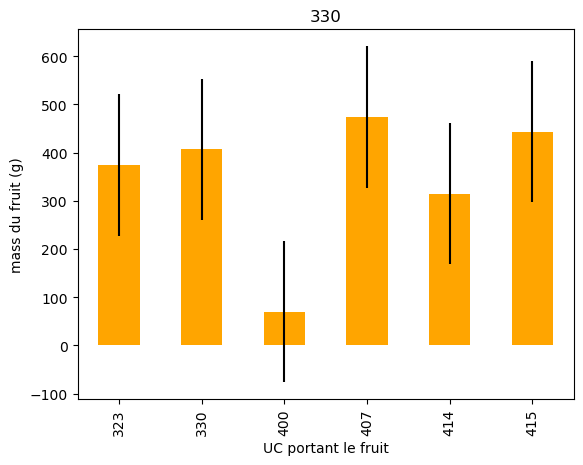

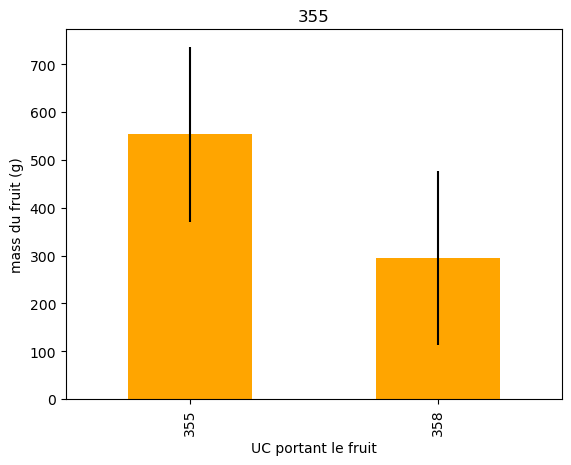

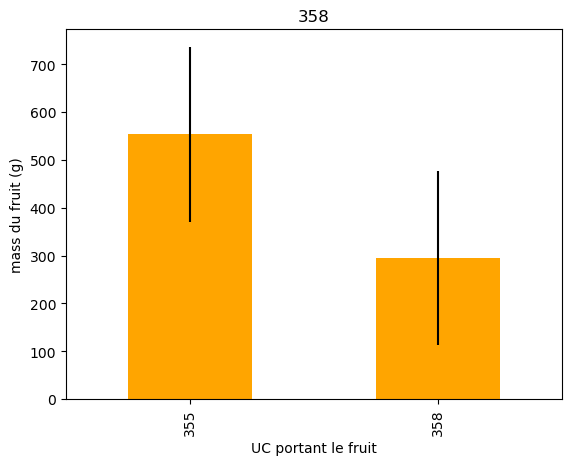

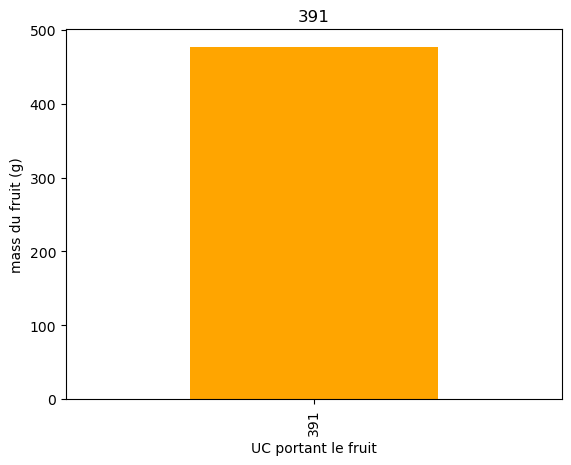

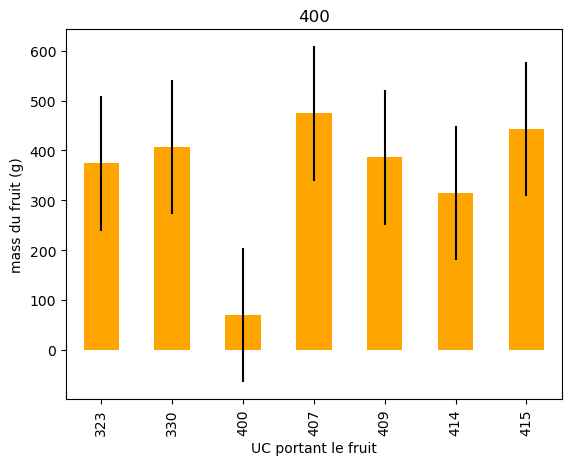

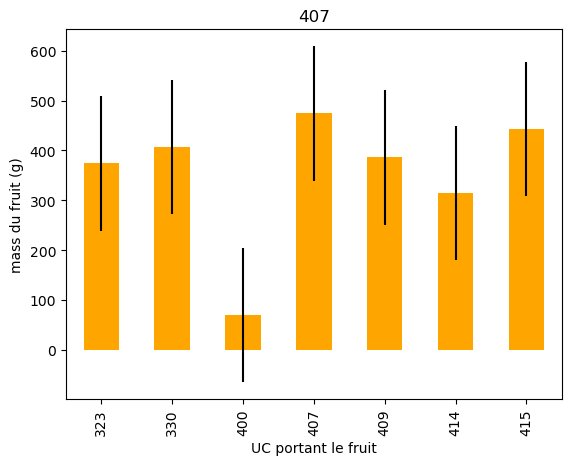

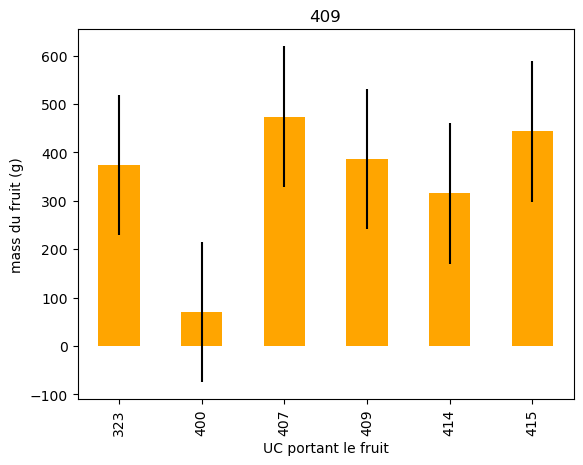

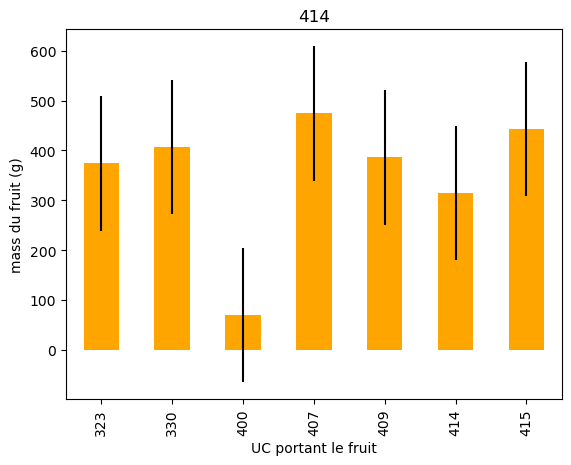

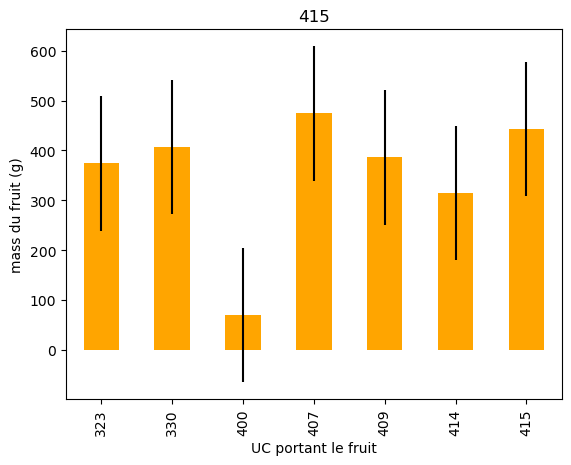

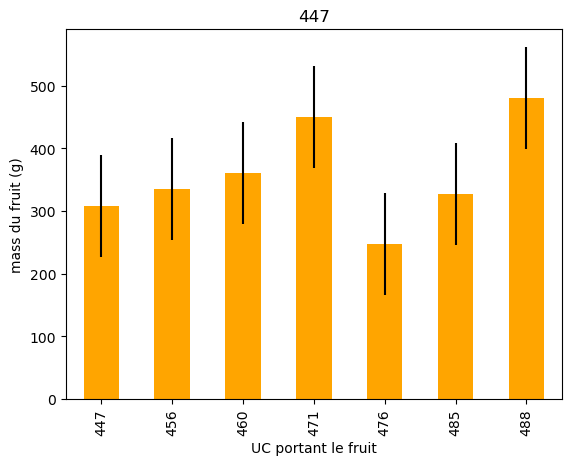

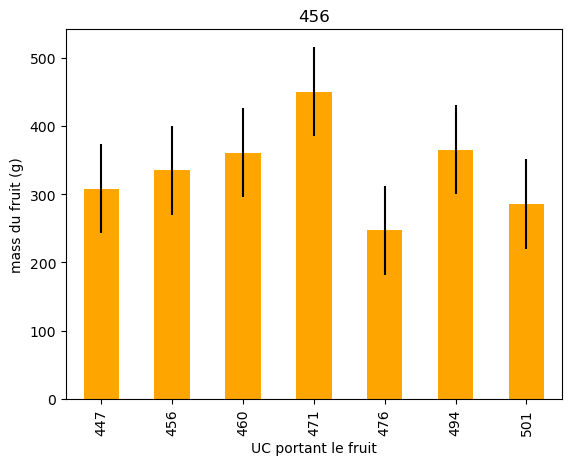

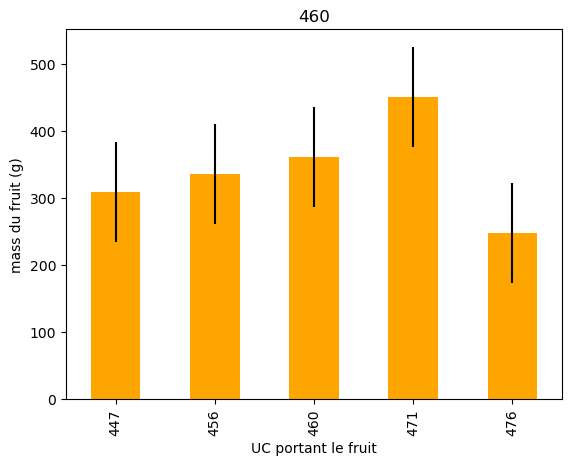

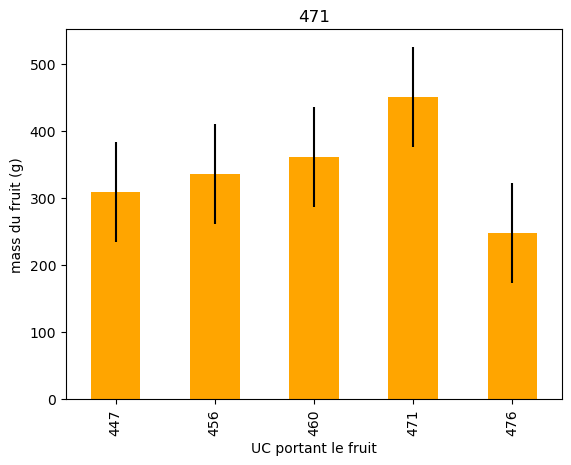

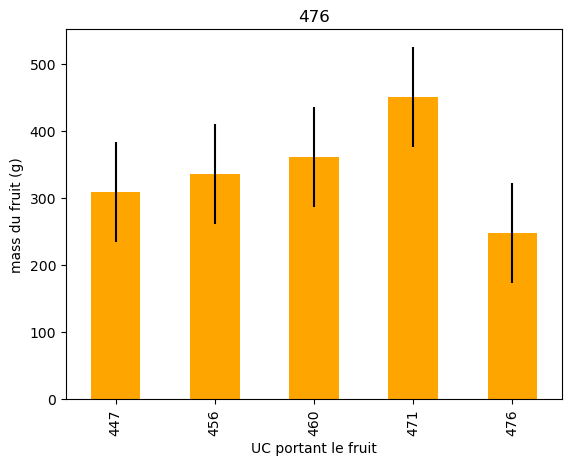

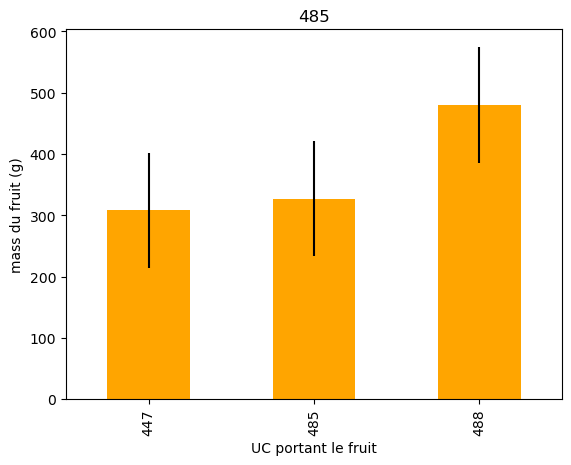

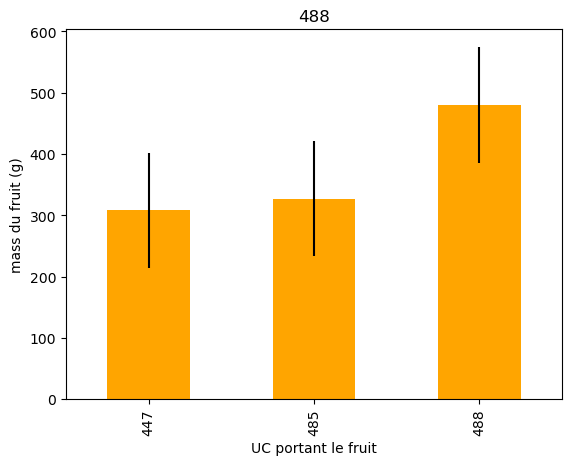

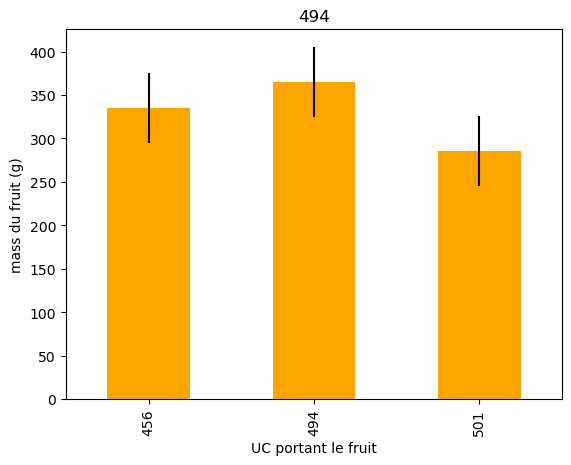

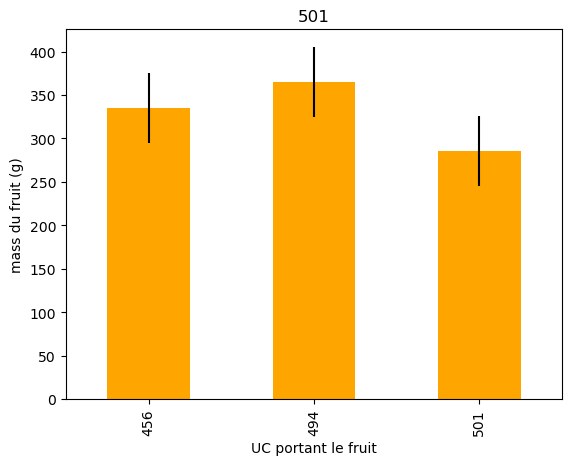

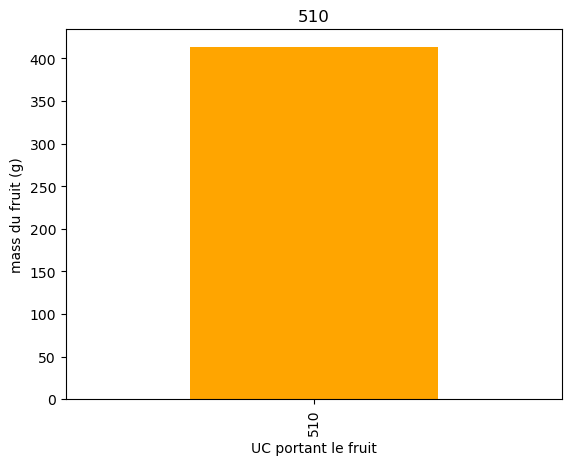

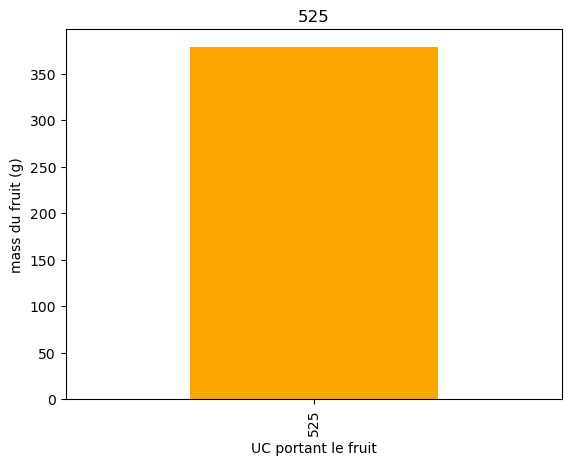

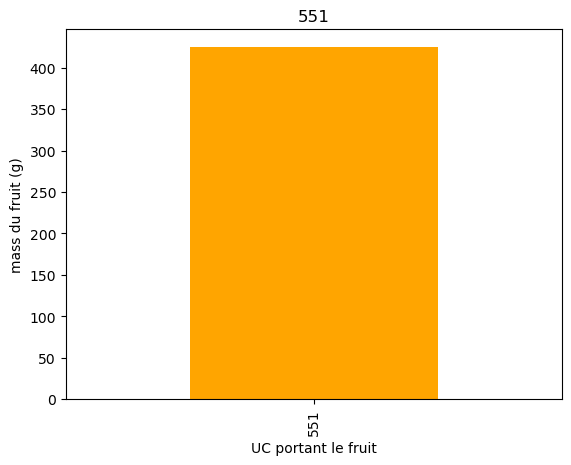

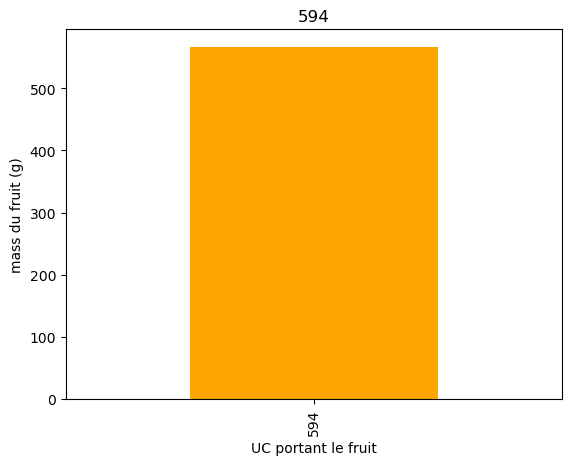

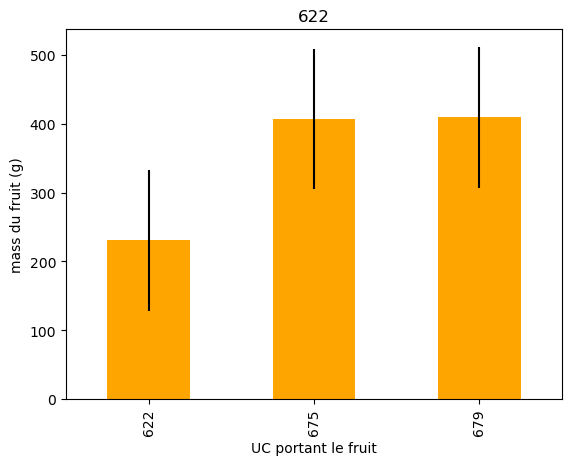

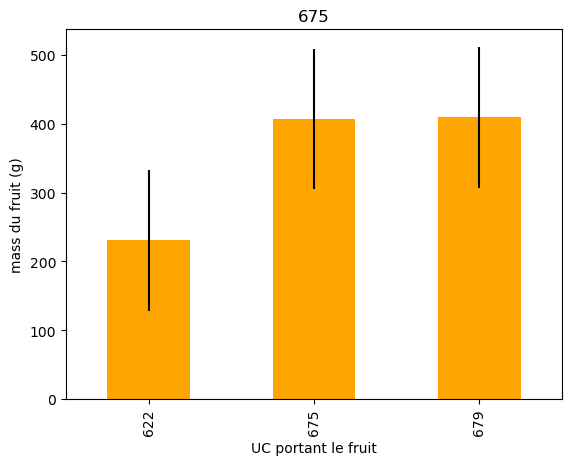

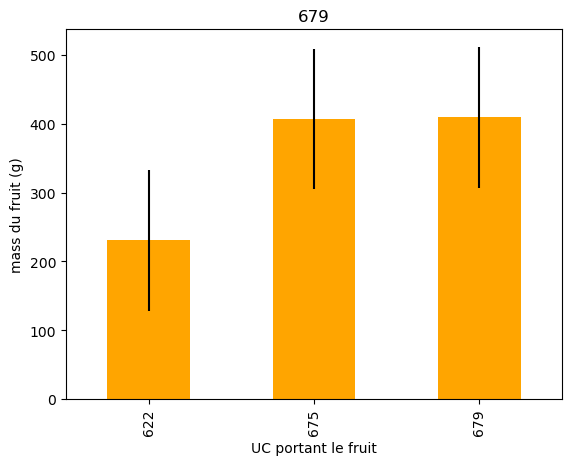

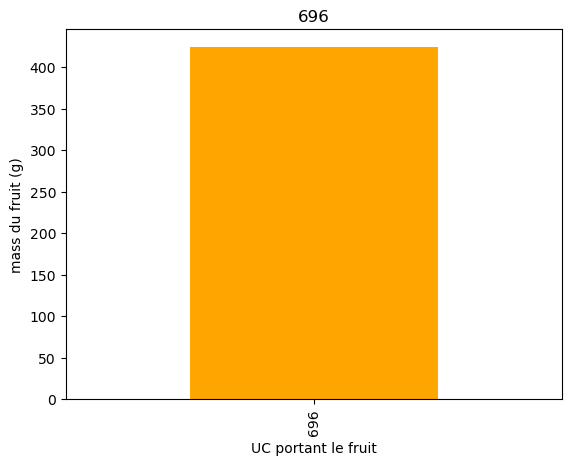

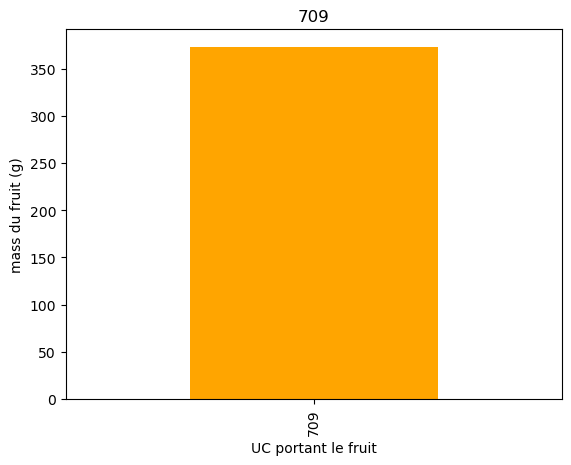

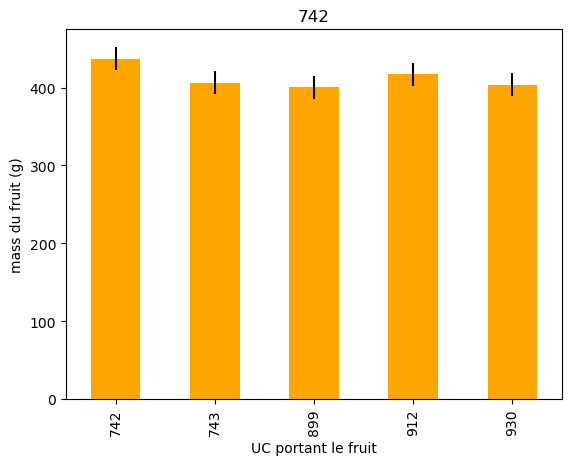

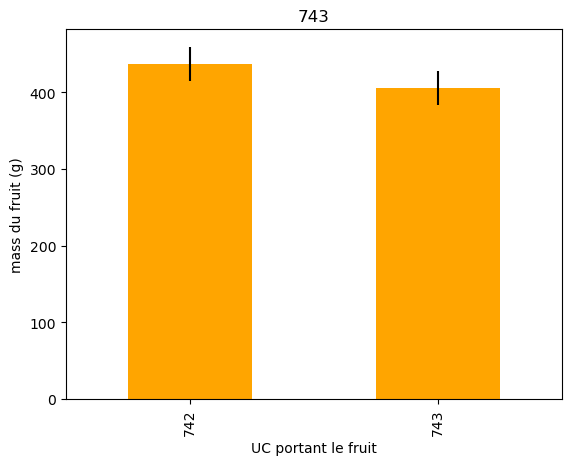

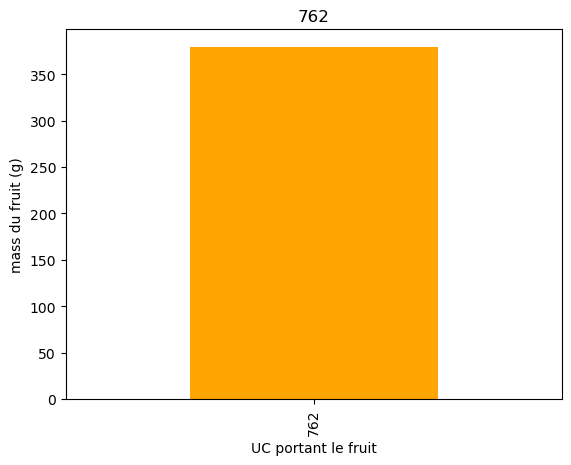

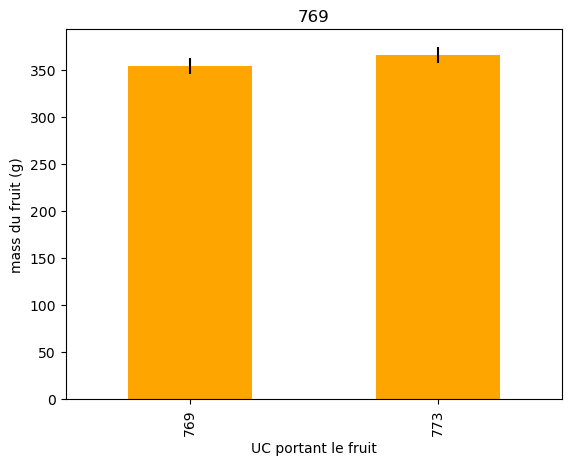

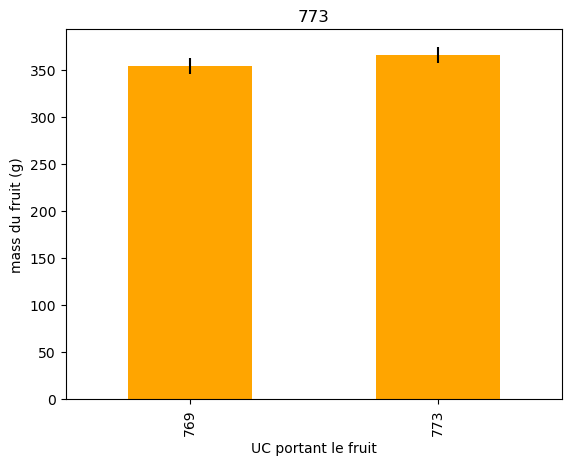

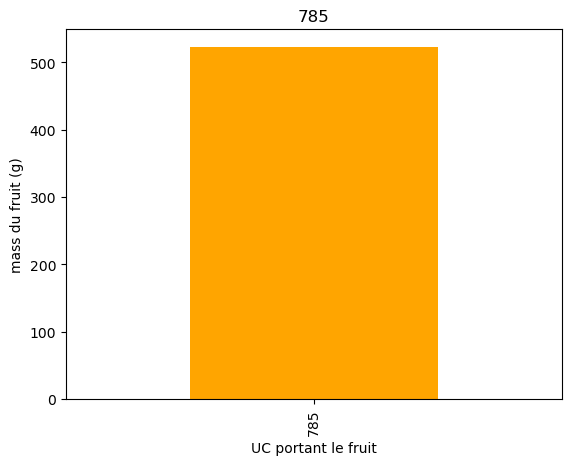

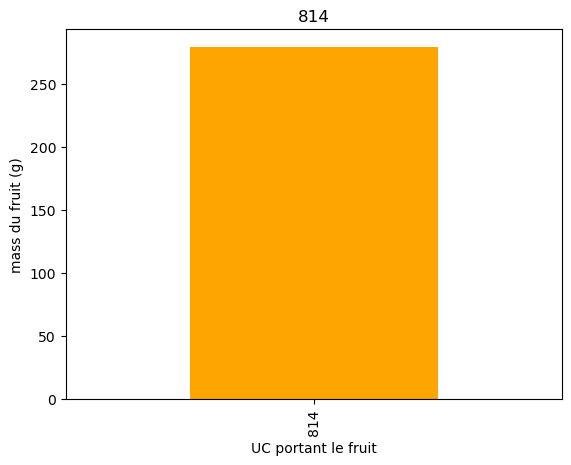

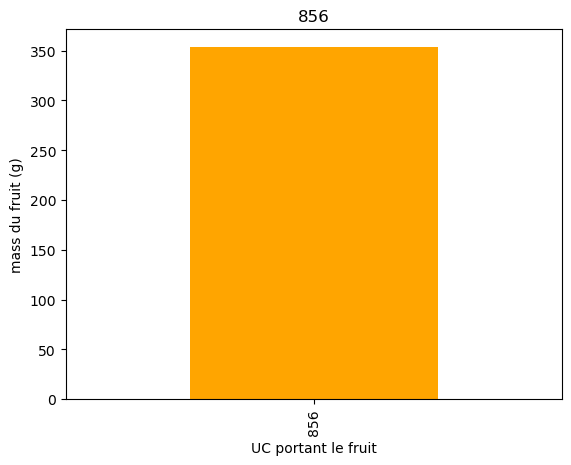

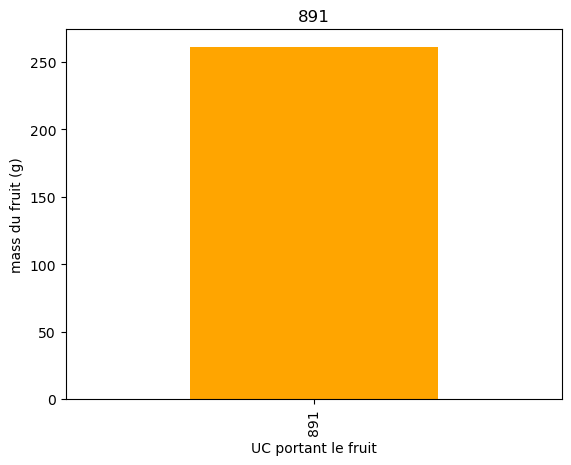

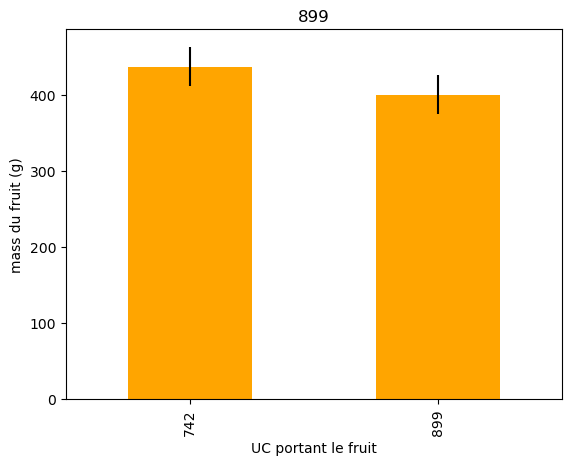

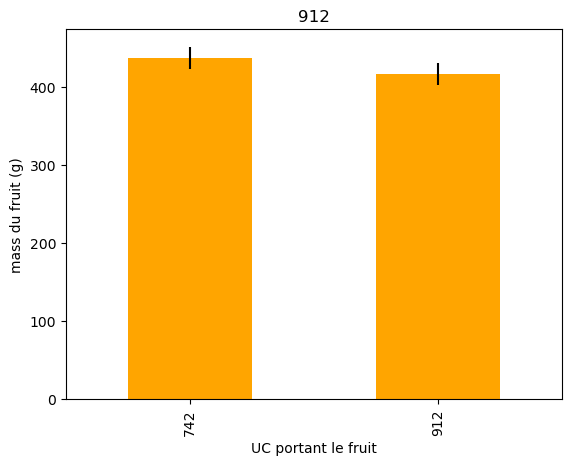

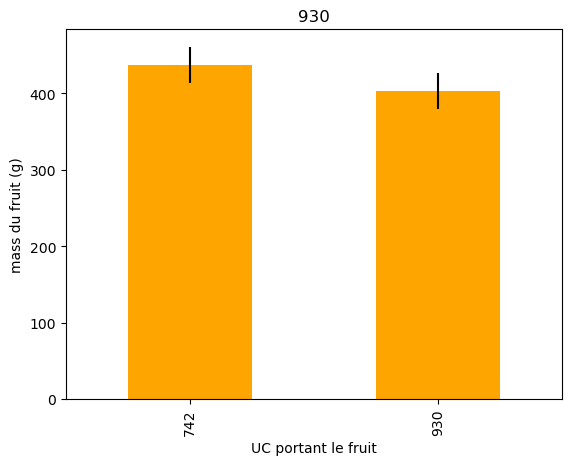

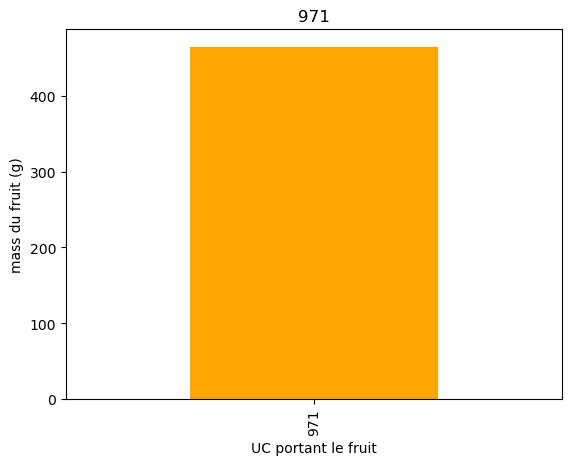

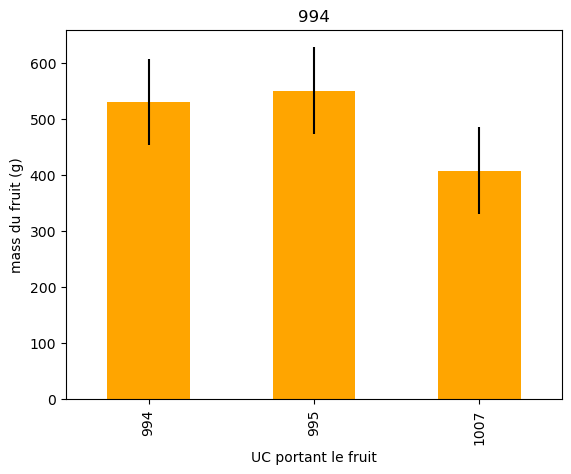

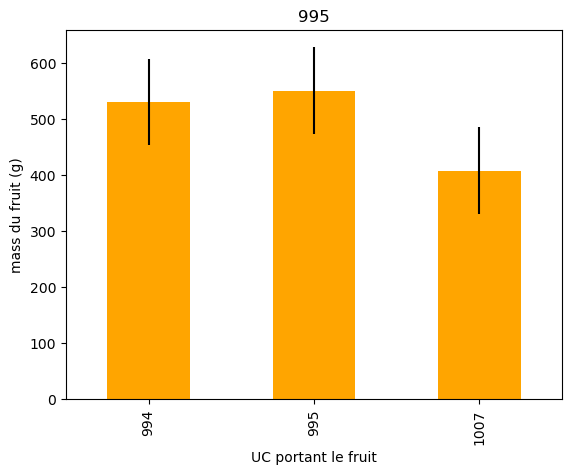

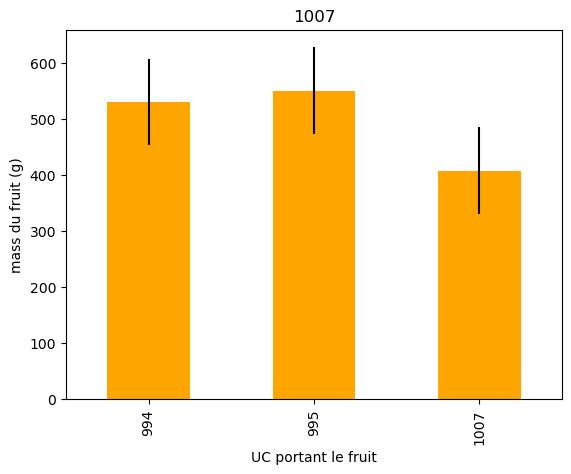

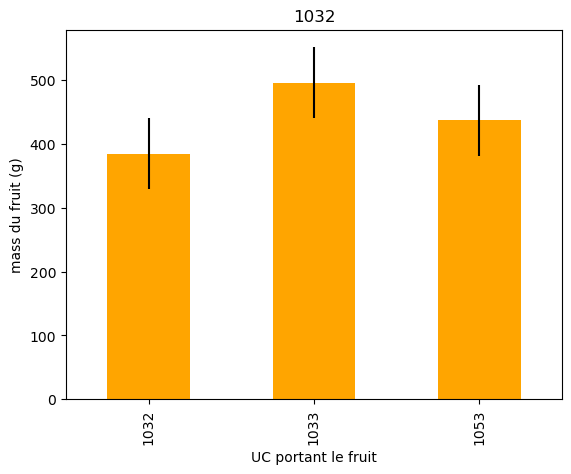

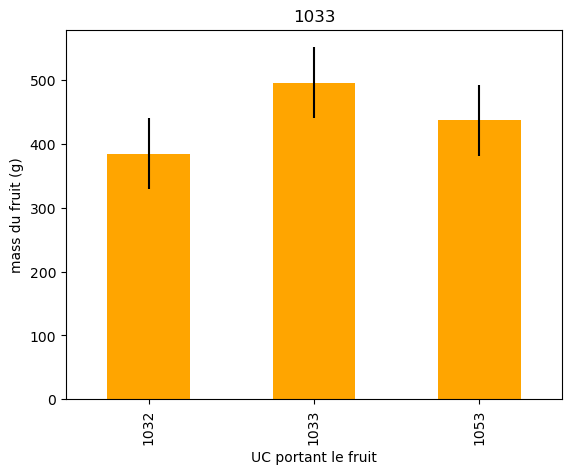

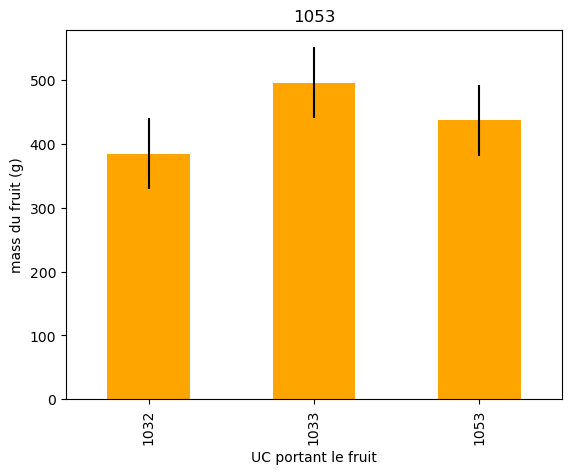

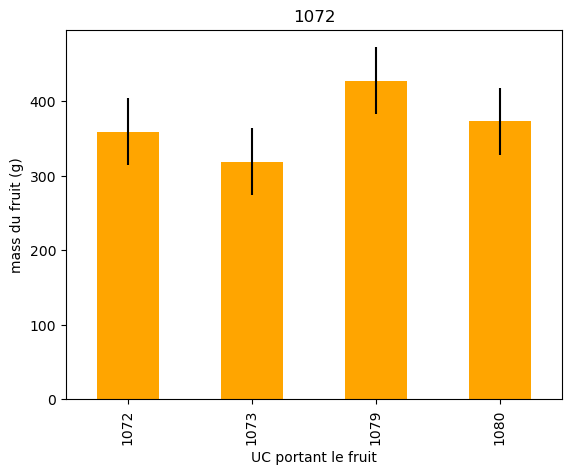

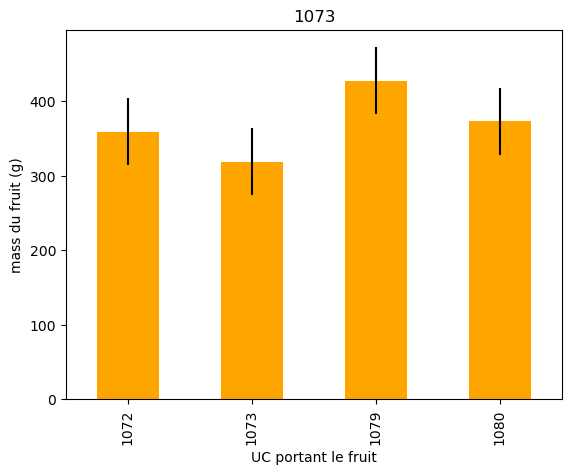

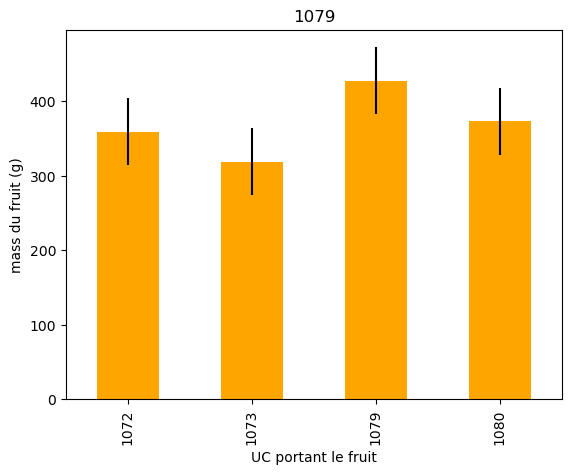

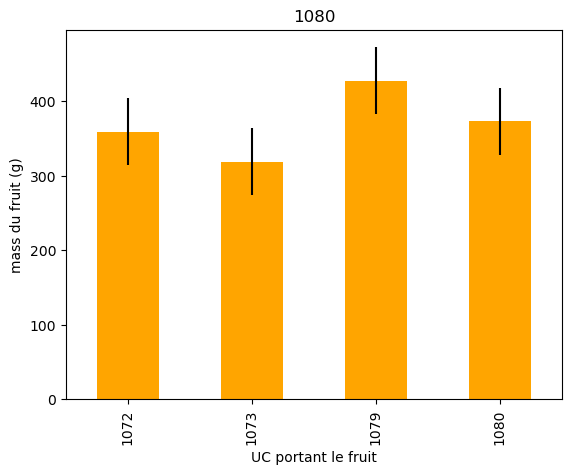

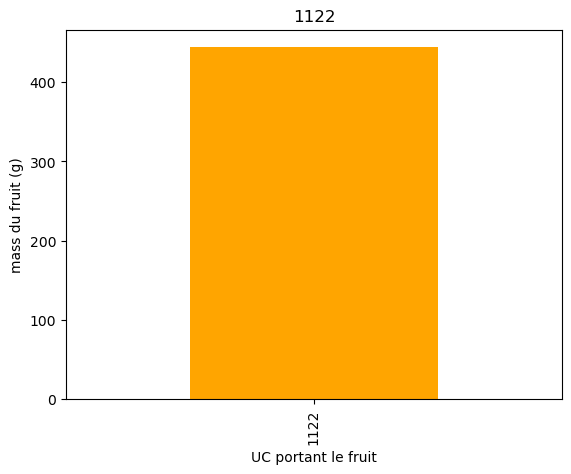

In [111]:
table = collect_branches(tree, 10)
for fruit in table.columns :
    selected_GU = table[fruit]
    selected_GU = pd.DataFrame(selected_GU[pd.notna(selected_GU)])
    selected_GU["standard deviation"] = np.full(fill_value=selected_GU.std(), shape = len(selected_GU))
    #print(selected_GU)
    plt.show(selected_GU[fruit].plot(kind="bar",title=fruit, xlabel="UC portant le fruit", ylabel="mass du fruit (g)", color="orange", yerr=selected_GU["standard deviation"]))

### Available carbon according to light environment

For each dmax between 0 and 10, the sum of available carbon for each fruit is plotted :

In [112]:
table_carbon = final_table.loc["shared light carbon"]
table_carbon["sum_carbon"] = table_carbon.sum(axis=1)
table_carbon

,69,71,165,205,241,246,254,289,494,501,...,891,971,994,995,1007,1032,1033,1053,1122,sum_carbon
distance,,,,,,,,,,,,,,,,,,,,,
0,0.749802,2.142292,0.867708,0.515375,2.078156,5.506125,0.29375,0.770938,0.352094,0.664583,...,0.573708,1.2375,3.4755,1.73775,0.847937,0.831396,0.237542,0.637828,1.6425,37.02412
1,0.950802,2.343292,0.991667,0.957125,4.040859,10.094563,0.979167,1.593271,0.645505,1.45,...,0.9835,1.35,6.70275,2.23425,2.826458,1.068937,0.475083,0.821891,3.285,64.594598
2,4.985451,4.985451,2.23125,0.957125,5.426297,10.706354,1.126042,2.107229,0.645505,1.45,...,1.188396,5.2875,5.337375,10.302374,6.422562,1.365865,1.365865,3.953047,3.44925,102.797907
3,5.169556,5.169556,2.23125,1.03075,5.888109,11.624042,1.370833,2.621188,0.645505,1.45,...,1.188396,6.8625,7.819875,10.798874,7.073625,2.019104,2.019104,4.474906,3.44925,117.476484
4,7.211806,7.211806,2.355208,1.067563,5.950641,11.686573,1.433365,2.723979,0.547701,1.45,...,1.352312,6.8625,9.309375,9.309375,7.073625,2.078489,2.078489,4.520922,3.44925,129.566394
5,7.238875,7.238875,2.616766,1.509312,6.241253,11.52131,1.940997,2.826771,1.638722,1.8125,...,1.639167,7.265625,9.309375,12.393239,7.073625,2.553573,2.553573,4.658969,3.44925,142.910713
6,7.708962,7.708962,2.841725,1.987875,6.292372,11.422451,2.307055,2.826771,2.68599,1.550694,...,1.639167,8.483229,10.851307,23.45762,6.856604,2.546888,2.546888,4.665654,3.44925,159.410558
7,15.749016,15.749016,3.658266,2.171937,7.276,9.780344,4.567969,2.826771,1.977061,1.909198,...,1.639167,8.591145,17.239026,19.612508,6.37417,2.360312,2.360312,4.869594,3.44925,180.498363
8,19.410714,19.410714,6.868506,2.981812,7.258752,7.258752,7.258752,2.826771,1.750824,1.860863,...,1.639167,8.762708,17.654914,19.548928,6.473928,3.706029,3.706029,3.574648,3.44925,198.573851


Distance dmax for which the available carbon is maximal :

In [113]:
table_carbon[table_carbon["sum_carbon"] == max(table_carbon["sum_carbon"])].index

Index([10], dtype='object', name='distance')

array([[<Axes: title={'center': '69'}, xlabel='distance to fruit', ylabel='availaible carbon'>,
        <Axes: title={'center': '71'}, xlabel='distance to fruit', ylabel='availaible carbon'>,
        <Axes: title={'center': '165'}, xlabel='distance to fruit', ylabel='availaible carbon'>,
        <Axes: title={'center': '205'}, xlabel='distance to fruit', ylabel='availaible carbon'>],
       [<Axes: title={'center': '241'}, xlabel='distance to fruit', ylabel='availaible carbon'>,
        <Axes: title={'center': '246'}, xlabel='distance to fruit', ylabel='availaible carbon'>,
        <Axes: title={'center': '254'}, xlabel='distance to fruit', ylabel='availaible carbon'>,
        <Axes: title={'center': '289'}, xlabel='distance to fruit', ylabel='availaible carbon'>],
       [<Axes: title={'center': '494'}, xlabel='distance to fruit', ylabel='availaible carbon'>,
        <Axes: title={'center': '501'}, xlabel='distance to fruit', ylabel='availaible carbon'>,
        <Axes: title={'center'

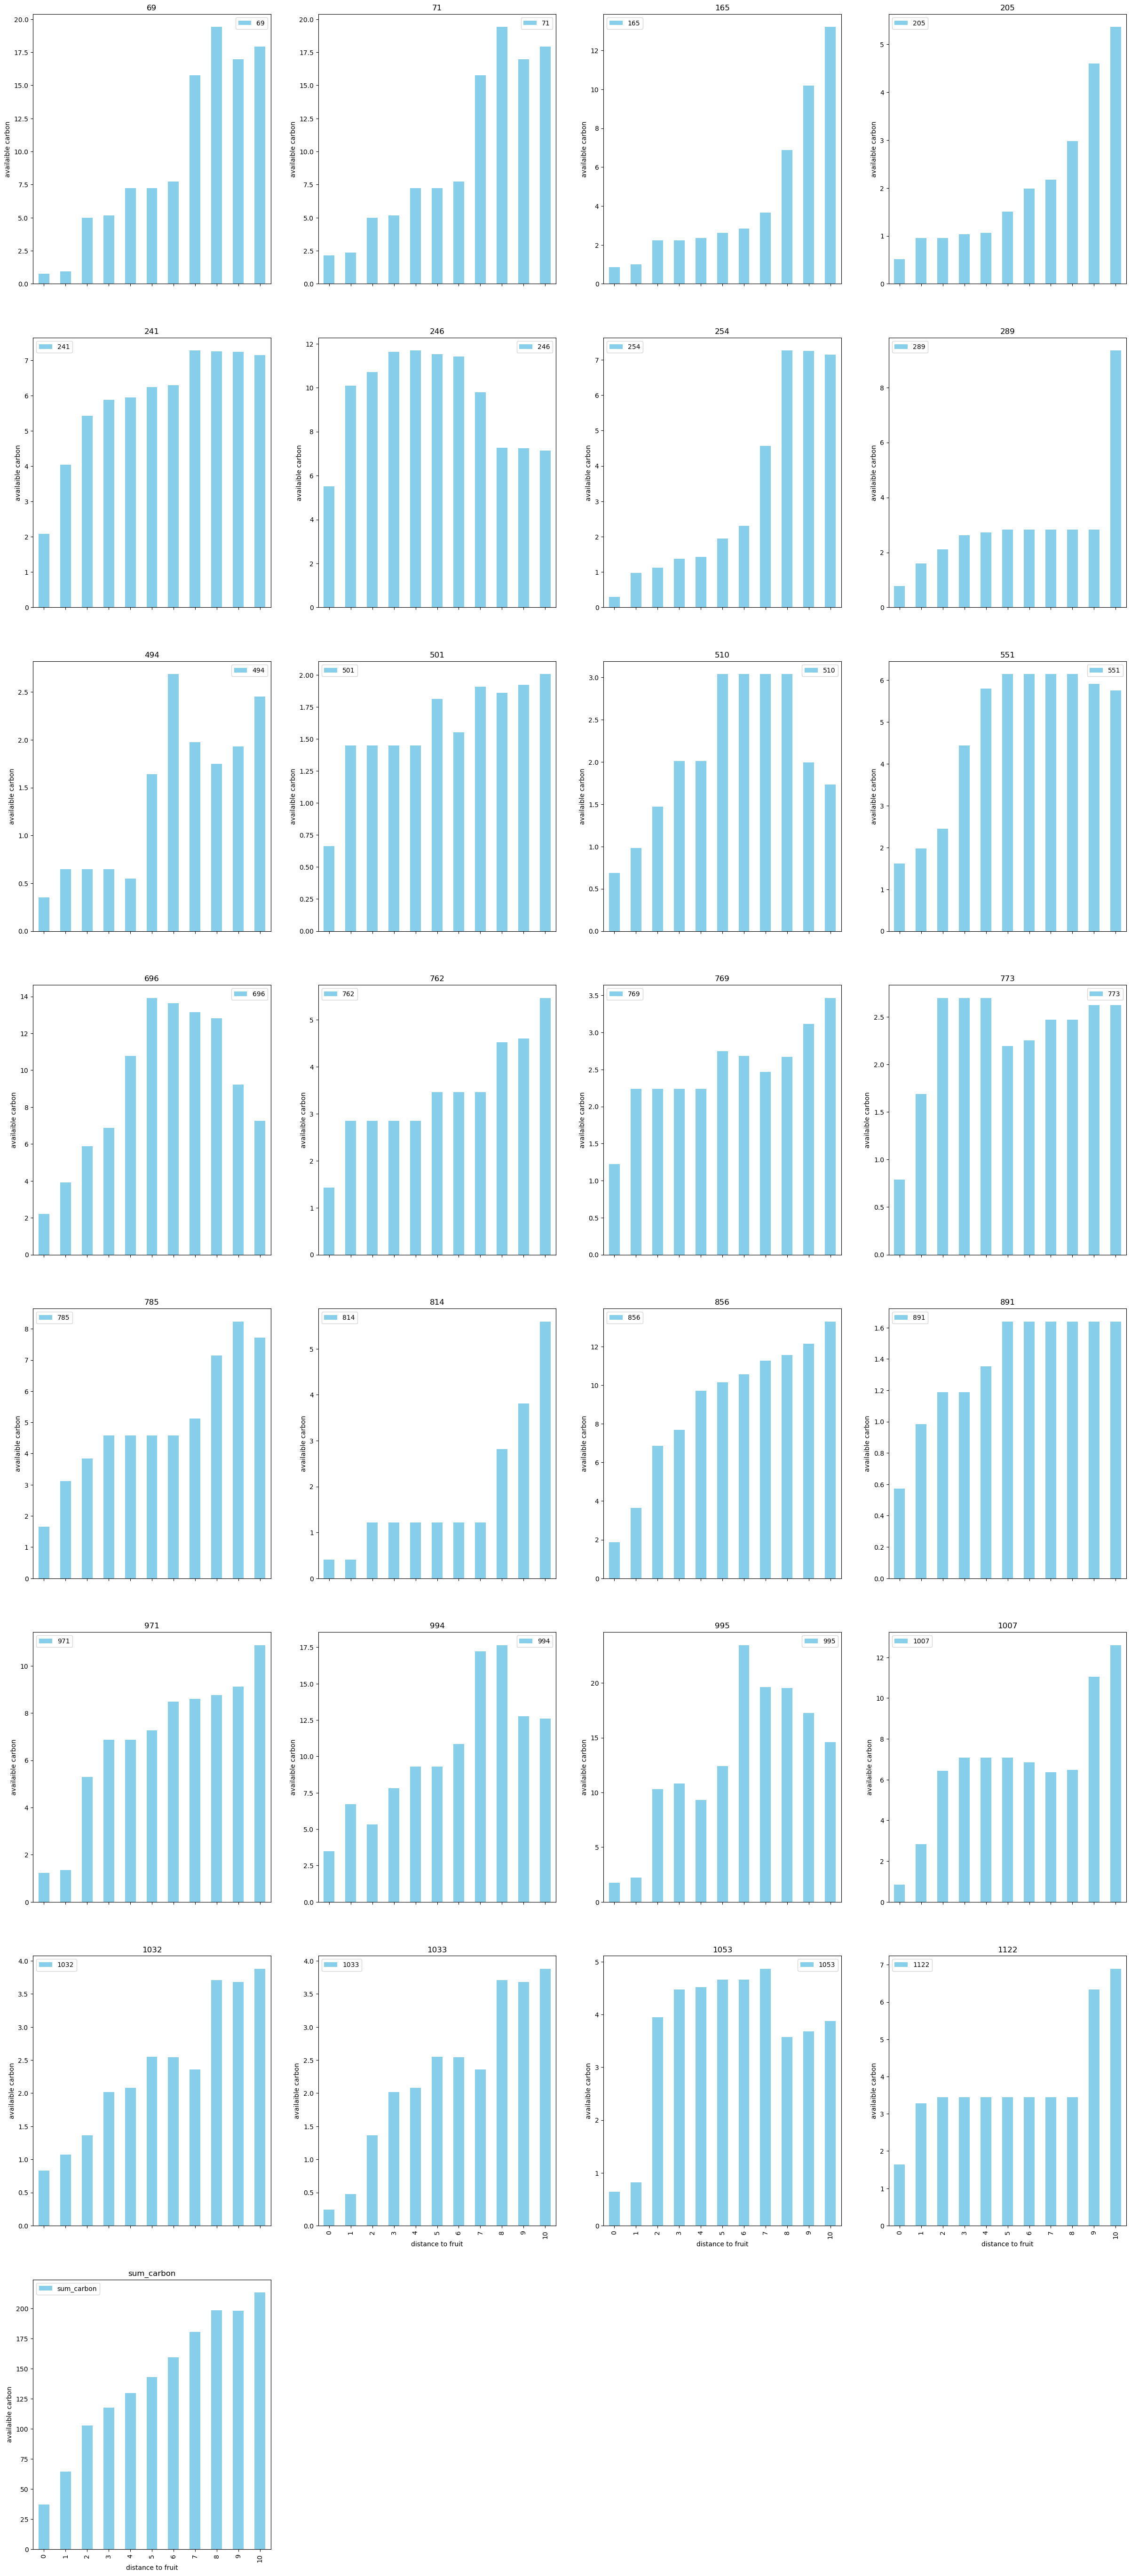

In [114]:
table_carbon.plot(kind='bar', subplots=True, figsize=(30,70), layout=(ceil(len(table_carbon.columns)/4), 4), xlabel="distance to fruit", ylabel="availaible carbon", color="skyblue")

### Number of GUs

Number of GUs in distance to fruit according to the distance from the fruit :

In [115]:
def get_number_of_GU_in_distance_to_fruit(tree, dmax, method = "exact"):
    graph = vmlab.to_graph(tree)
    adjacency = np.array(graph.get_adjacency())
    is_fruting = (tree['arch_dev__pot_nb_fruit'] > 0)

    # GU in distance
    if np.any(is_fruting) : 
        distance_to_fruit = csgraph.shortest_path( 
                                    adjacency,
                                    indices=np.flatnonzero(tree["arch_dev__pot_nb_fruit"]>0),
                                    directed=False
                                ).astype(np.float32)
        if method == "exact":
                    distance_to_fruit[distance_to_fruit != dmax] = np.inf #collecting GU at a dmax distance
        else :
                distance_to_fruit[distance_to_fruit > dmax] = np.inf #collecting GU under a dmax distance
        is_in_distance_to_fruit = np.isfinite(distance_to_fruit).astype(np.float32)

    number_of_GU_in_distance_to_fruit = np.nansum(is_in_distance_to_fruit, axis=1)
    return number_of_GU_in_distance_to_fruit

In [116]:
get_number_of_GU_in_distance_to_fruit(tree,10)

array([ 6.,  6.,  6.,  6., 29.,  8.,  4.,  4.,  4., 14.,  7.,  7., 12.,
        4.,  4.,  5.,  1.,  5.,  7.,  5.,  5.,  6.,  3.,  5.,  5.,  5.,
        5., 12.,  4.,  2.,  7.,  6.,  6.,  4., 12.,  7.,  7.,  7., 10.,
        9., 31., 10., 10., 10.,  6., 16.,  8.,  1., 15.,  9., 12., 18.,
       16., 12., 16., 17., 17., 17.,  3.,  3.,  2.,  2.,  7.],
      dtype=float32)

In [117]:
branches = [get_number_of_GU_in_distance_to_fruit(tree, i) for i in range (0,dmax+1)]

# table row names : id of the GU bearing the fruit 
branches = pd.DataFrame(branches, columns=np.flatnonzero(tree["arch_dev__pot_nb_fruit"]>0), index=[i for i in range (0, dmax+1)])
branches

,58,69,71,165,173,205,241,246,254,261,...,995,1007,1032,1033,1053,1072,1073,1079,1080,1122
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,6.0,6.0,2.0,3.0,1.0,2.0,1.0,1.0,1.0,...,5.0,3.0,3.0,3.0,7.0,3.0,3.0,4.0,4.0,1.0
3,4.0,4.0,4.0,1.0,7.0,1.0,1.0,1.0,1.0,1.0,...,3.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,1.0
4,7.0,7.0,7.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,...,3.0,1.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0
5,9.0,2.0,2.0,3.0,4.0,2.0,4.0,4.0,4.0,2.0,...,5.0,1.0,6.0,6.0,4.0,3.0,3.0,1.0,1.0,1.0
6,11.0,8.0,8.0,7.0,10.0,4.0,4.0,4.0,4.0,4.0,...,11.0,3.0,4.0,4.0,5.0,3.0,3.0,1.0,1.0,1.0
7,9.0,18.0,18.0,9.0,20.0,4.0,5.0,5.0,5.0,7.0,...,9.0,6.0,6.0,6.0,8.0,6.0,6.0,2.0,2.0,3.0
8,18.0,17.0,17.0,11.0,16.0,5.0,5.0,6.0,6.0,7.0,...,9.0,10.0,14.0,14.0,10.0,6.0,6.0,4.0,4.0,4.0
9,22.0,14.0,14.0,8.0,22.0,7.0,3.0,3.0,3.0,13.0,...,16.0,20.0,9.0,9.0,9.0,3.0,3.0,2.0,2.0,9.0


array([[<Axes: title={'center': '58'}, xlabel='distance to fruit', ylabel='number of GU in distance'>,
        <Axes: title={'center': '69'}, xlabel='distance to fruit', ylabel='number of GU in distance'>,
        <Axes: title={'center': '71'}, xlabel='distance to fruit', ylabel='number of GU in distance'>,
        <Axes: title={'center': '165'}, xlabel='distance to fruit', ylabel='number of GU in distance'>],
       [<Axes: title={'center': '173'}, xlabel='distance to fruit', ylabel='number of GU in distance'>,
        <Axes: title={'center': '205'}, xlabel='distance to fruit', ylabel='number of GU in distance'>,
        <Axes: title={'center': '241'}, xlabel='distance to fruit', ylabel='number of GU in distance'>,
        <Axes: title={'center': '246'}, xlabel='distance to fruit', ylabel='number of GU in distance'>],
       [<Axes: title={'center': '254'}, xlabel='distance to fruit', ylabel='number of GU in distance'>,
        <Axes: title={'center': '261'}, xlabel='distance to fruit

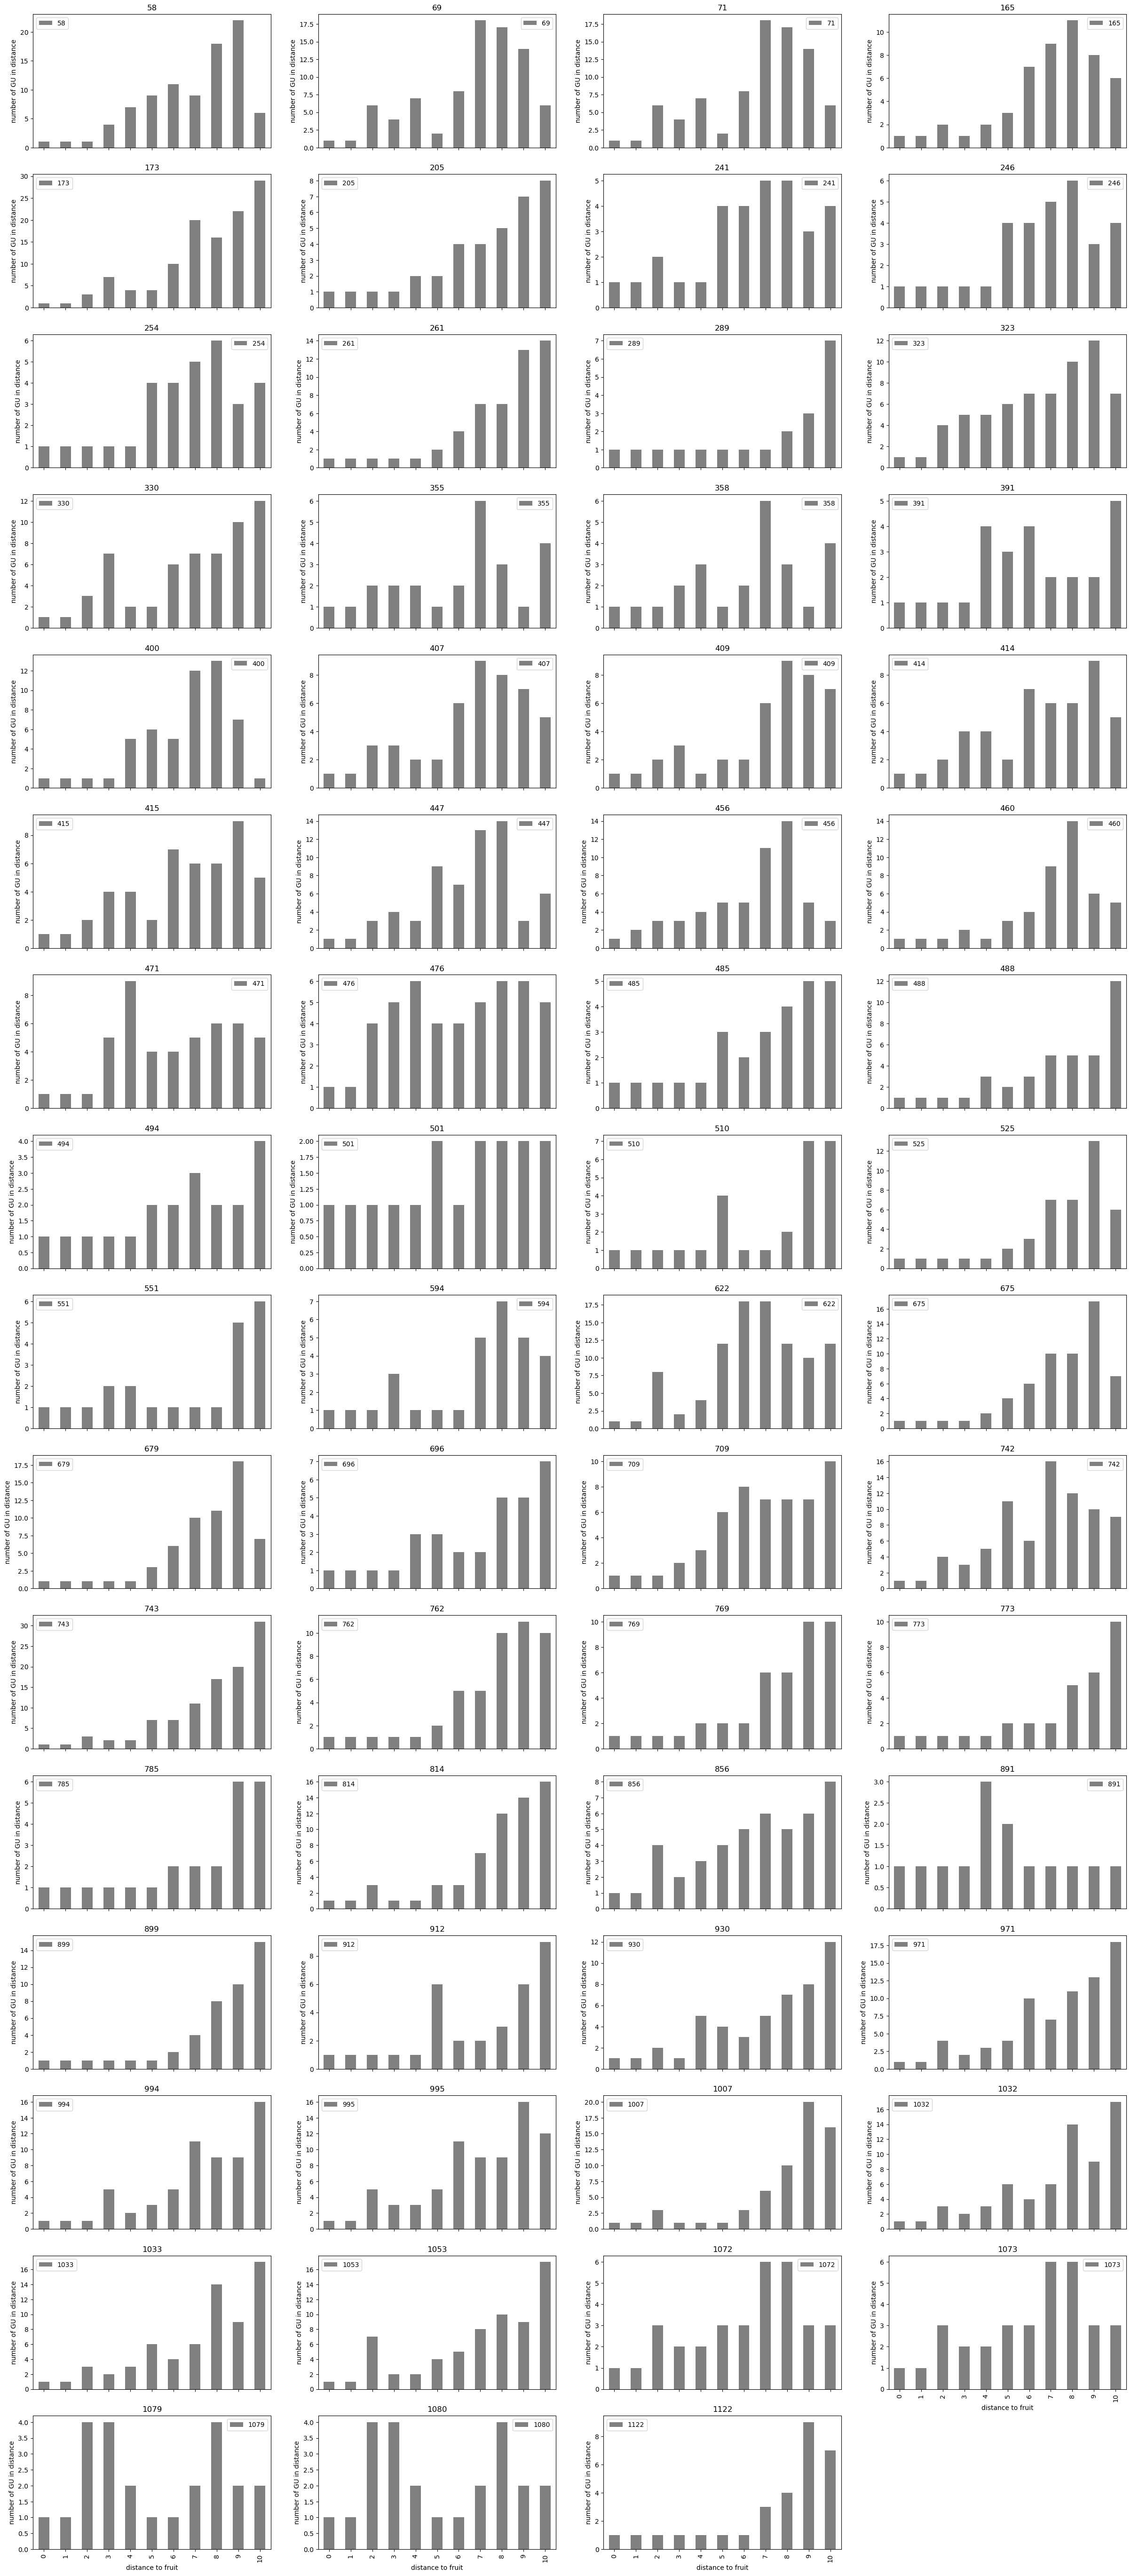

In [118]:
branches.plot(kind='bar',subplots=True, figsize=(30,70), layout=(ceil(len(branches.columns)/4), 4), xlabel="distance to fruit", ylabel="number of GU in distance", color="grey")